<font size=6>支持向量机</font>
# SVM
SVM的全称是Support Vector Machine，即支持向量机，主要用于解决模式识别领域中的数据分类问题，属于有监督学习算法的一种。支持向量机虽然诞生只有短短的二十多年，但是自一诞生便由于它良好的分类性能席卷了机器学习领域，并牢牢压制了神经网络领域好多年。如果不考虑集成学习的算法，不考虑特定的训练数据集，在分类算法中的表现SVM可以说是最优异的。

SVM支持二元分类，线性分类和非线性分类。经过演进，现在也可以支持多元分类，同时经过扩展，也能应用于回归问题。

# 线性支持向量机
## 回顾感知机模型
1. 标签$y$值为$-1或1$
2. 分离超平面：$w^Tx + b = 0$
3. 感知机损失函数：$\sum\limits_{x_i \in M}- y^{(i)}(w^Tx^{(i)} +b)\big / ||w||_2\to\sum\limits_{x_i \in M}- y^{(i)}(w^Tx^{(i)} +b)$
<img src="images/1042406-20161124135616081-623185925.jpg">

## 函数间隔与几何间隔
在感知机模型中，对于分离超平面$w^Tx + b = 0$，$|w^Tx + b |$表示点$x$到超平面的相对距离。通过观察$w^Tx + b$和$y$是否同号，可以判断分类是否正确。这里函数间隔定义为$\gamma^{'} = y(w^Tx + b)$。

函数间隔并不能正常反应点到超平面的距离，几何间隔定义为$\gamma = \frac{y(w^Tx + b)}{||w||_2}$，几何间隔才是点到超平面的真正距离，感知机模型里用到的距离就是几何距离。

## 支持向量
<img width="60%" src="images/1042406-20161124144326487-1331861308.jpg">

**总结：**
1. 感知机目标是是所有点尽可能的原理分离超平面；
2. 支持向量机，不考虑较远的点，只考虑距离超平面较近的点，使其尽可能距离超平面较远，这些点叫做支持向量

## SVM模型目标函数与优化
SVM的模型是让所有点到超平面的距离大于一定的距离，也就是所有的分类点要在各自类别的支持向量两边。用数学式子表示为：
$$max \;\; \gamma = \frac{y(w^Tx + b)}{||w||_2}  \;\; s.t \;\; y_i(w^Tx_i + b) = \gamma^{'(i)} \geq \gamma^{'} (i =1,2,...m)$$
一般我们都取函数间隔$\gamma^{'} = y(w^Tx + b)=1$，这样我们的优化函数定义为：
$$max \;\; \frac{1}{||w||_2}  \;\; s.t \;\; y_i(w^Tx_i + b)  \geq 1 (i =1,2,...m)$$
也就是说，我们要在约束条件$y_i(w^Tx_i + b)  \geq 1 (i =1,2,...m)$下，最大化$\frac{1)}{||w||_2}$。**可以看出，这里的优化方式不同，感知机是固定分母优化分子，而SVM是固定分子优化分母，同时加上了支持向量的限制。**

由于$\frac{1}{||w||_2}$的最大化等同于$\frac{1}{2}||w||_2^2$的最小化。这样SVM的优化函数等价于
$$min \;\; \frac{1}{2}||w||_2^2  \;\; s.t \;\; y_i(w^Tx_i + b)  \geq 1 (i =1,2,...m)$$
由于目标函数$\frac{1}{2}||w||_2^2$是凸函数，同时约束条件不等式是仿射的，根据凸优化理论，我们可以通过拉格朗日函数将我们的优化目标转化为无约束的优化函数
$$L(w,b,\alpha) = \frac{1}{2}||w||_2^2 - \sum\limits_{i=1}^{m}\alpha_i[y_i(w^Tx_i + b) - 1] \; 满足\alpha_i \geq 0$$
其中$\alpha$为拉格朗日乘子向量。

由于引入了拉格朗日乘子，我们的优化目标变成：
$$\underbrace{min}_{w,b}\; \underbrace{max}_{\alpha_i \geq 0} L(w,b,\alpha)$$
我们的这个优化函数满足KKT条件，也就是说，我们可以通过拉格朗日对偶将我们的优化问题转化为等价的对偶问题来求解。也就是说，现在我们要求的是：
$$\underbrace{max}_{\alpha_i \geq 0} \;\underbrace{min}_{w,b}\;  L(w,b,\alpha)$$

注：详细拉格朗日函数以及对偶化推导过程见:**[零基础学SVM](https://zhuanlan.zhihu.com/p/24638007)和[如何理解拉格朗日乘子法和KKT条件？](https://www.matongxue.com/madocs/987.html)**

从上式中，我们可以先求优化函数对于$w和b$的极小值。接着再求拉格朗日乘子$α$的极大值。

首先，我们来求$L(w,b,\alpha) $基于$w和b$的极小值，即$\underbrace{min}_{w,b}\;  L(w,b,\alpha)$。这个极值我们可以通过对$w和b$分别求偏导数得到：
$$\frac{\partial L}{\partial w} = 0 \;\Rightarrow w = \sum\limits_{i=1}^{m}\alpha_iy_ix_i\\\frac{\partial L}{\partial b} = 0 \;\Rightarrow \sum\limits_{i=1}^{m}\alpha_iy_i = 0$$
从上两式子可以看出，我们已经求得了$w和α$的关系，只要我们后面接着能够求出优化函数极大化对应的$α$，就可以求出我们的$w$了，至于$b$，由于上两式已经没有$b$，所以最后的$b$可以有多个。

定义：
$$\psi(\alpha) = \underbrace{min}_{w,b}\;  L(w,b,\alpha)$$

将$w$替换为$\alpha$的表达式以后的优化函数(**省略详细推导过程**)：
$$\begin{align}\psi(\alpha) 
& =\underbrace{min}_{w,b}\;  L(w,b,\alpha)\\ 
& =\underbrace{min}_{w,b}\;  \frac{1}{2}||w||_2^2 - \sum\limits_{i=1}^{m}\alpha_i[y_i(w^Tx_i + b) - 1] \\
& =\underbrace{min}_{w,b}\;  \sum\limits_{i=1}^{m}\alpha_i  - \frac{1}{2}\sum\limits_{i=1,j=1}^{m}\alpha_i\alpha_jy_iy_jx_i^Tx_j\\
& =\sum\limits_{i=1}^{m}\alpha_i  - \frac{1}{2}\sum\limits_{i=1,j=1}^{m}\alpha_i\alpha_jy_iy_jx_i^Tx_j
\end{align}$$

从上面可以看出，通过对$w,b$极小化后，我们的优化函数$\psi (\alpha)$仅仅只有$\alpha$向量做参数，消除了$w,b$参数。接下来我们极大化$\psi (\alpha)$，就可以求出此时对应的$\alpha$，进而求出$w,b$。

$$$$
$$\begin{align}
& \underbrace{max}_{\alpha_i \geq 0} \;\underbrace{min}_{w,b}\;L(w,b,\alpha)\\
&= \underbrace{max}_{\alpha_i \geq 0} \;\psi(\alpha)\\
&= \underbrace{max}_{\alpha} -\frac{1}{2}\sum\limits_{i=1}^{m}\sum\limits_{j=1}^{m}\alpha_i\alpha_jy_iy_j(x_i \bullet x_j) + \sum\limits_{i=1}^{m} \alpha_i\\
&= \underbrace{min}_{\alpha} \frac{1}{2}\sum\limits_{i=1}^{m}\sum\limits_{j=1}^{m}\alpha_i\alpha_jy_iy_j(x_i \bullet x_j) -  \sum\limits_{i=1}^{m} \alpha_i\\
&s.t. \; \sum\limits_{i=1}^{m}\alpha_iy_i = 0\\
&\alpha_i \geq 0  \; i=1,2,...m
\end{align}$$



只要我们可以求出上式极小化时对应的$α$向量就可以求出$w和b$了。具体怎么极小化上式得到对应的$α$，一般需要用到SMO算法，这个算法比较复杂，后面会有介绍。在这里，我们假设通过SMO算法，我们得到了对应的$α$的值$\alpha ^*$。

我们根据$w = \sum\limits_{i=1}^{m}\alpha_iy_ix_i$，可以求出对应的$w$的值$w^{*} = \sum\limits_{i=1}^{m}\alpha_i^{*}y_ix_i$。

求$b$则稍微麻烦一点。注意到，对于任意支持向量$(x_s, y_s)$，都有$y_s(w^Tx_s+b) = y_s(\sum\limits_{i=1}^{m}\alpha_iy_ix_i^Tx_s+b) = 1$。假设我们有$S$个支持向量，则对应我们求出$S个b^*$，理论上这些$b^*$都可以作为最终的结果， 但是我们一般采用一种更健壮的办法，即求出所有支持向量所对应的$b^*_s$，然后将其平均值作为最后的结果。注意到对于严格线性可分的SVM，$b$的值是有唯一解的，也就是这里求出的所有$b^*$都是一样的，这里我们仍然这么写是为了和后面加入软间隔后的SVM的算法描述一致。

根据KKT条件中的对偶互补条件$\alpha_{i}^{*}(y_i(w^Tx_i + b) - 1) = 0$(**详见推荐文章**)，如果$\alpha_i>0$则有$y_i(w^Tx_i + b) =1$即点为支持向量，否则如果$\alpha_i=0$则有$y_i(w^Tx_i + b)\geq 1$，即样本为支持向量或者已经被正确分类。

## 线性可分SVM的算法过程
**输入：**

线性可分的$m$个样本$(x_1,y_1),\dots,(x_m,y_m)$，其中$x$为$n$维特征向量。$y$为二元输出，值为$-1或1$。

**输出：**

分离超平面的参数$w^*和b^*$和分类决策函数。

**算法过程：**
1. 构造约束优化问题：$$\underbrace{min}_{\alpha} \frac{1}{2}\sum\limits_{i=1}^{m}\sum\limits_{j=1}^{m}\alpha_i\alpha_jy_iy_j(x_i \bullet x_j) -  \sum\limits_{i=1}^{m} \alpha_i\\s.t. \; \sum\limits_{i=1}^{m}\alpha_iy_i = 0\\\alpha_i \geq 0  \; i=1,2,...m$$
2. 用SMO算法求出上式最小时对应的$\alpha$向量的值$\alpha^*$向量。
3. 计算$w^{*} = \sum\limits_{i=1}^{m}\alpha_i^{*}y_ix_i$
4. 找出所有的$S$个支持向量，即满足$\alpha_s>0$对应的样本$(x_s,y_s)$，通过$y_s(\sum\limits_{i=1}^{m}\alpha_iy_ix_i^Tx_s+b) = 1$，计算出每个支持向量$(x_s,y_s)$对应的$b_s^*$，计算公式为$b_s^{*} = y_s - \sum\limits_{i=1}^{s}\alpha_iy_ix_i^Tx_s$。所有的$b_s^*$对应的平均值即为最终的$b^{*} = \frac{1}{S}\sum\limits_{i=1}^{S}b_s^{*}$。
5. 最终的分类超平面为$w^{*} \bullet x + b^{*} = 0$，最终的分类决策函数为$f(x) = sign(w^{*} \bullet x + b^{*})$


# 线性支持向量机的软间隔最大化模型
## 线性分类SVM面临的问题
由于异常点，导致不能线性分类或者弱化分类效果
<table style="width:80%"><tr>
    <td>不能线性分类</td><td>分类效果不佳</td>
    </tr><tr>
    <td><img src="images/1042406-20161125104106409-1177897648.png"></td>
    <td><img src="images/1042406-20161125104737206-364720074.png"></td>
    </tr></table>

## 线性分类SVM的软间隔最大化
软间隔，是相对于硬间隔说的，上述线性分类SVM的学习方法属于硬间隔最大化。

已知硬间隔最大化的条件：
$$min \;\; \frac{1}{2}||w||_2^2  \;\; s.t \;\; y_i(w^Tx_i + b)  \geq 1 (i =1,2,...m)$$

软间隔最大化，SVM对训练集里面的每个样本$(x_i,y_i)$引入了一个松弛变量$\xi_i \geq 0$，使函数间隔加上松弛变量大于等于1，也就是说：
$$y_i(w\bullet x_i +b) \geq 1- \xi_i$$
<img src="images/784325-20190106205611985-1231595363.png">
**如图：**
1. 在硬间隔中：决策平面是绿色实线，约束条件是要保证两类样本点分别位于两条绿色虚线的两侧，所有样本点都被正确分类。
2. 在软间隔中：决策平面是绿色实线，约束条件变为蓝色虚线，且红色样本点在红色箭头一侧即可，紫色样本点在紫色箭头一侧即可。

对比硬间隔最大化，可以看到我们对样本到超平面的函数距离的要求放松了，之前是一定要大于等于1，现在只需要加上一个大于等于0的松弛变量能大于等于1就可以了。当然，松弛变量不能白加，这是有成本的，每一个松弛变量$\xi_i$，对应了一个代价$\xi_i$，从而我们的软间隔最大化的SVM学习条件如下：
$$min\;\; \frac{1}{2}||w||_2^2 +C\sum\limits_{i=1}^{m}\xi_i\\s.t.  \;\; y_i(w^Tx_i + b)  \geq 1 - \xi_i \;\;(i =1,2,...m)\\\xi_i \geq 0 \;\;(i =1,2,...m)$$

这里,$C>0$为惩罚参数，可以理解为我们一般回归和分类问题正则化时候的参数。$C$越大，对误分类的惩罚越大，$C$越小，对误分类的惩罚越小。也就是说，我们希望$\frac{1}{2}||w||_2^2 $尽量小，误分类的点尽可能的少。$C$是协调两者关系的正则化惩罚系数。在实际应用中，需要调参来选择。
## 线性分类SVM的软间隔最大化目标函数的优化
线性可分SVM的优化方式类似，我们首先将软间隔最大化的约束问题用拉格朗日函数转化为无约束问题如下：
$$L(w,b,\xi,\alpha,\mu) = \frac{1}{2}||w||_2^2 +C\sum\limits_{i=1}^{m}\xi_i - \sum\limits_{i=1}^{m}\alpha_i[y_i(w^Tx_i + b) - 1 + \xi_i] - \sum\limits_{i=1}^{m}\mu_i\xi_i$$
其中$\mu_i \geq 0, \alpha_i \geq 0$，均为拉格朗日系数。

也就是说，我们现在要优化的目标函数是：$$\underbrace{min}_{w,b,\xi}\; \underbrace{max}_{\alpha_i \geq 0, \mu_i \geq 0,} L(w,b,\alpha, \xi,\mu)$$

这个优化目标也满足KKT条件，也就是说，我们可以通过拉格朗日对偶将我们的优化问题转化为等价的对偶问题来求解如下：$$\underbrace{max}_{\alpha_i \geq 0, \mu_i \geq 0,} \; \underbrace{min}_{w,b,\xi}\; L(w,b,\alpha, \xi,\mu)$$

我们可以先求优化函数对于$w, b, \xi$的极小值, 接着再求拉格朗日乘子$\alpha$和 $\mu$的极大值。

首先我们来求优化函数对于$w, b, \xi$的极小值，这个可以通过求偏导数求得：
$$\frac{\partial L}{\partial w} = 0 \;\Rightarrow w = \sum\limits_{i=1}^{m}\alpha_iy_ix_i\\\frac{\partial L}{\partial b} = 0 \;\Rightarrow \sum\limits_{i=1}^{m}\alpha_iy_i = 0\\\frac{\partial L}{\partial \xi} = 0 \;\Rightarrow C- \alpha_i - \mu_i = 0$$

我们可以利用上面的三个式子去消除$w, b$。
$$\begin{align} L(w,b,\xi,\alpha,\mu) 
& = \frac{1}{2}||w||_2^2 +C\sum\limits_{i=1}^{m}\xi_i - \sum\limits_{i=1}^{m}\alpha_i[y_i(w^Tx_i + b) - 1 + \xi_i] - \sum\limits_{i=1}^{m}\mu_i\xi_i 　\\
& = \sum\limits_{i=1}^{m}\alpha_i - \frac{1}{2}\sum\limits_{i=1,j=1}^{m}\alpha_i\alpha_jy_iy_jx_i^Tx_j 
\end{align}$$

上式，和我们硬间隔SVM拉格朗日函数推导式一样，唯一不一样的是约束条件。现在我们的优化目标的数学形式为：
$$\begin{align}
&\underbrace{max}_{\alpha_i \geq 0, \mu_i \geq 0,} \; \underbrace{min}_{w,b,\xi}\; L(w,b,\alpha, \xi,\mu)\\
&=\underbrace{ max }_{\alpha} \sum\limits_{i=1}^{m}\alpha_i - \frac{1}{2}\sum\limits_{i=1,j=1}^{m}\alpha_i\alpha_jy_iy_jx_i^Tx_j\\
&=\underbrace{min}_{\alpha} \frac{1}{2}\sum\limits_{i=1}^{m}\sum\limits_{j=1}^{m}\alpha_i\alpha_jy_iy_j(x_i \bullet x_j) -  \sum\limits_{i=1}^{m} \alpha_i\\
&s.t. \; \sum\limits_{i=1}^{m}\alpha_iy_i = 0\\
&{\color {red}C}\geq \alpha_i \geq 0  \; i=1,2,...m\\
\end{align}$$

这就是软间隔最大化时的线性可分SVM的优化目标形式，和硬间隔最大化的线性可分SVM相比，我们多了一个约束条件${\color {red}C}\geq \alpha_i \geq 0$。

这样，我们依然可以通过SMO算法来求上式极小化时对应的$α$向量就可以求出$w和b$了。

## 软间隔最大化时的支持向量
在硬间隔最大化时，支持向量比较简单。在软间隔最大化时，则稍微复杂一些，因为我们对每个样本$(x_i,y_i)$引入了松弛变量$\xi_i$。根据KKT条件中的对偶互补条件$\alpha_{i}^{*}(y_i(w^Tx_i + b) - 1+\xi_i) = 0$(**详见推荐文章**)。可知，$\alpha_i>0$(即$\alpha_i\not =0$)的样本为支持向量，在间隔边界上、间隔边界与决策超平面之间、或者在超平面误分一侧的向量都有可能是支持向量，这是因为软间隔模型中的每个样本的$\alpha_i$、$\xi_i$不同。

我们从下图来研究软间隔最大化是支持向量的情况，第$i$个点对应类别支持向量的距离为$\frac{\xi_i}{||w||_2}$：
1. 如果$\alpha_i=0$，那么$y_i(w^Tx_i + b) - 1 +\xi_i\geq 0$,即样本被正确分类。
2. 如果$0 < \alpha_i < C$，那么根据你KKT条件中的互补条件$\mu_i\xi_i=0$,以及$C-\alpha_i-\mu_i=0$，可得$\xi_i=0$。另由于$y_i(w^Tx_i + b) - 1 +\xi_i=0$，则$y_i(w^Tx_i + b) = 1$，即该点为支持向量。
3. 如果$\alpha=C$，说明这是一个可能比较异常的点，需要检查此时$\xi_i$
    1. 如果$0\leq\xi_i<1$，那么点被正确分类，但是却在超平面和自己类别的间隔边界之间。如图中的样本2和4。
    2. 如果$\xi_i=1$，那么点在分离超平面上，无法被正确分类。
    3. 如果$\xi_i>1$，那么点在超平面的另一侧，也就是说，这个点不能被正常分类。如图中的样本1和3。
    
<img width="50%" src="images/1042406-20161125133202346-307657619.jpg">

# 线性不可分支持向量机与核函数
上面我们讲到了线性可分SVM的硬间隔最大化和软间隔最大化的算法，它们对线性可分的数据有很好的处理，但是对完全线性不可分的数据没有办法。接下来，我们来探讨SVM如何处理线性不可分的数据，重点讲述核函数在SVM中处理线性不可分数据的作用。
## 回顾多项式回归
之前在线性回归原理中，讲过可以将多项式回归转化为线性回归。如一个只有两个特征的$p$次方多项式回归的模型：
$$h_\theta(x_1, x_2) = \theta_0 + \theta_{1}x_1 + \theta_{2}x_{2} + \theta_{3}x_1^{2} + \theta_{4}x_2^{2} + \theta_{5}x_{1}x_2$$

我们令$x_0=1,x_1=x_1,x_2=x_2,x_3=x_1^2,x_4=x_2^2,x_5=x_1x_2$，这样我们就得到了下式：
$$h_\theta(x_1, x_2) = \theta_0 + \theta_{1}x_1 + \theta_{2}x_{2} + \theta_{3}x_3 + \theta_{4}x_4 + \theta_{5}x_5$$

可以发现，我们又重新回到了线性回归，这是一个五元线性回归，可以用线性回归的方法来完成算法。对于每个二元样本特征$(x_1,x_2)$,我们得到一个五元样本特征$(1, x_1, x_2, x_{1}^2, x_{2}^2, x_{1}x_2)$，通过这个改进的五元样本特征，我们重新把不是线性回归的函数变回线性回归。

也就是说，对于二维的不是线性的数据，我们将其映射到了五维以后，就变成了线性的数据。

总结来说，对于在低维线性不可分的数据，在映射到了高维以后，就变成线性可分的了。这个思想我们同样可以运用到SVM的线性不可分数据上。对于SVM线性不可分的低维特征数据，我们可以将其映射到高维，就能线性可分，此时就可以运用线性可分SVM的算法思想了。

## 核函数的引入
线性可分SVM的优化目标函数：
$$\underbrace{ min }_{\alpha}  \frac{1}{2}\sum\limits_{i=1,j=1}^{m}\alpha_i\alpha_jy_iy_jx_i \bullet x_j - \sum\limits_{i=1}^{m}\alpha_i\\
s.t. \; \sum\limits_{i=1}^{m}\alpha_iy_i = 0\\
0 \leq \alpha_i \leq C
$$

上式低维特征仅仅以内积$$x_i \bullet x_j$$的形式出现，如果我们定义一个低维特征空间到高维特征空间的映射$\phi$(例如，上面2维到5维的映射)，将所有特征映射到一个更高的维度，让数据线性可分，我们就可以继续按线性可分SVM的算法思想来优化目标函数，求出分离超平面和分类决策函数了。也就是说现在的SVM的优化目标函数变成：
$$\underbrace{ min }_{\alpha}  \frac{1}{2}\sum\limits_{i=1,j=1}^{m}\alpha_i\alpha_jy_iy_j\phi(x_i) \bullet \phi(x_j) - \sum\limits_{i=1}^{m}\alpha_i\\
s.t. \; \sum\limits_{i=1}^{m}\alpha_iy_i = 0\\
0 \leq \alpha_i \leq C
$$

和线性可分SVM的优化目标函数的区别仅仅是将内积$x_i \bullet x_j$替换为$\phi(x_i) \bullet \phi(x_j)$。

这时候，假如是一个2维特征的数据，我们可以将其映射到5维来做特征的内积，如果原始空间是三维，可以映射到到19维空间，似乎还可以处理。但是如果我们的低维特征是100个维度，1000个维度。那么我们要将其映射到超级高的维度来计算特征的内积。这时候映射成的高维维度是爆炸性增长的，这个计算量实在是太大了，而且如果遇到无穷维的情况，就根本无从计算。

这里需要引用核函数，解决上述问题。假设$\phi$是一个从低维的输入空间$\chi$（欧式空间的子集或者离散集合）到高维的希尔伯特空间的$\mathcal{H}$映射。那么如果存在函数$K(y,z)$，对于任意$y, z \in \chi$，都有：
$$K(y, z) = \phi(x_i) \bullet \phi(x_j)$$

那么我们就称$K(y,z)$为核函数。$K(y,z)$的计算是在低维特征空间来计算的，它避免了上面提到的在高维维度空间计算内积的恐怖计算量的同时，实现了在高维特征空间线性可分的目的。

## 核函数的介绍
### 线性核函数
线性核函数（Linear Kernel）其实就是我们线性可分SVM，表达式为：
$$K(x, z) = x \bullet z$$

也就是说，线性可分SVM我们可以和线性不可分SVM归为一类，区别仅仅在于线性可分SVM用的是线性核函数。

### 多项式核函数
多项式核函数（Polynomial Kernel）是线性不可分SVM常用的核函数之一，表达式为：
$$K(x, z) = （\gamma x \bullet z  + r)^d$$

其中，$\gamma, r, d$都需要自己调参定义。

### 高斯核函数
高斯核函数（Gaussian Kernel），在SVM中也称为径向基核函数（Radial Basis Function,RBF），它是非线性分类SVM最主流的核函数。表达式为：
$$K(x, z) = exp(-\gamma||x-z||^2)$$

其中，$\gamma>0$，需要自己调参定义。
### Sigmoid核函数
Sigmoid核函数（Sigmoid Kernel）也是线性不可分SVM常用的核函数之一，表达式为：
$$K(x, z) = tanh（\gamma x \bullet z  + r)$$

其中，$\gamma,r$都需要自己调参定义。

# 线性支持回归
前面讲了SVM的线性分类和非线性分类，实际上SVM也可以用于回归。
## SVM回归模型的损失函数度量
前面SVM分类模型中，我们的目标函数是让$\frac{1}{2}||w||_2^2$最小，同时让各个训练集中的点尽量远离自己类别一边的的支持向量，即$y_i(w \bullet \phi(x_i )+ b) \geq 1$。如果是加入一个松弛变量$\xi_i \geq 0$,则目标函数是$\frac{1}{2}||w||_2^2 +C\sum\limits_{i=1}^{m}\xi_i$，对应的约束条件变成：$y_i(w \bullet \phi(x_i ) + b )  \geq 1 - \xi_i$。

对于回归模型，优化目标函数可以继续和SVM分类模型保持一致为$\frac{1}{2}||w||_2^2$，对于约束条件，我们的目标是让训练集中的每一个点，尽量拟合到一个线性模型$y_i ~= w \bullet \phi(x_i ) +b$。对于一般的回归模型，我们是用均方差作为损失函数,但是SVM不是这样定义损失函数的。

SVM需要我们定义一个常量$\epsilon > 0$,对于某一个点$(x_i,y_i)$，如果$|y_i - w \bullet \phi(x_i ) -b| \leq \epsilon$，则完全没有损失，如果$|y_i - w \bullet \phi(x_i ) -b| > \epsilon$,则对应的损失为$|y_i - w \bullet \phi(x_i ) -b| - \epsilon$。

如下图所示，在蓝色条带里面的点都是没有损失的，但是外面的点的是有损失的，损失大小为红色线的长度。
<img src="images/1042406-20161129125204240-1430845027.png">

最终，SVM回归模型的损失函数度量为：
$$err(x_i,y_i) =  \begin{cases} 0 & {|y_i - w \bullet \phi(x_i ) -b| \leq \epsilon}\\ |y_i - w \bullet \phi(x_i ) -b| - \epsilon & {|y_i - w \bullet \phi(x_i ) -b| > \epsilon} \end{cases}$$

## SVM回归模型的目标函数的原始形式
我们的目标函数如下：
$$min\;\; \frac{1}{2}||w||_2^2  \;\; s.t \;\; |y_i - w \bullet \phi(x_i ) -b| \leq \epsilon (i =1,2,...m)$$

和SVM分类模型相似，回归模型也可以对每个样本$(x_i,y_i)$加入松弛变量$\xi_i \geq 0$, 但是由于我们这里用的是绝对值，实际上是两个不等式，也就是说两边都需要松弛变量，我们定义为$\xi_i^{\lor}, \xi_i^{\land}$, 则我们SVM回归模型的损失函数度量在加入松弛变量之后变为：
$$min\;\; \frac{1}{2}||w||_2^2 + C\sum\limits_{i=1}^{m}(\xi_i^{\lor}+ \xi_i^{\land})\\
s.t. \;\;\; -\epsilon - \xi_i^{\lor} \leq y_i - w \bullet \phi(x_i ) -b \leq \epsilon + \xi_i^{\land}\\
\xi_i^{\lor} \geq 0, \;\; \xi_i^{\land} \geq 0 \;(i = 1,2,..., m)$$

依然和SVM分类模型相似，我们可以用拉格朗日函数将目标优化函数变成无约束的形式，也就是拉格朗日函数的原始形式如下：
$$L(w,b,\alpha^{\lor}, \alpha^{\land}, \xi_i^{\lor}, \xi_i^{\land}, \mu^{\lor}, \mu^{\land}) \\
= \frac{1}{2}||w||_2^2 + C\sum\limits_{i=1}^{m}(\xi_i^{\lor}+ \xi_i^{\land}) + \sum\limits_{i=1}^{m}\alpha^{\lor}(-\epsilon - \xi_i^{\lor} -y_i + w \bullet \phi(x_i) + b) + \sum\limits_{i=1}^{m}\alpha^{\land}(y_i - w \bullet \phi(x_i ) - b -\epsilon - \xi_i^{\land}) - \sum\limits_{i=1}^{m}\mu^{\lor}\xi_i^{\lor} - \sum\limits_{i=1}^{m}\mu^{\land}\xi_i^{\land}$$

其中，$\mu^{\lor} \geq 0, \mu^{\land} \geq 0, \alpha_i^{\lor} \geq 0, \alpha_i^{\land} \geq 0$，均为拉格朗日系数。

## SVM回归模型的目标函数的对偶形式
上面，我们讲到了SVM回归模型的目标函数的原始形式,我们的目标是
$$\underbrace{min}_{w,b,\xi_i^{\lor}, \xi_i^{\land}}\; \;\;\;\;\;\;\;\;\underbrace{max}_{\mu^{\lor} \geq 0, \mu^{\land} \geq 0, \alpha_i^{\lor} \geq 0, \alpha_i^{\land} \geq 0}\;L(w,b,\alpha^{\lor}, \alpha^{\land}, \xi_i^{\lor}, \xi_i^{\land}, \mu^{\lor}, \mu^{\land})$$

和SVM分类模型一样，这个优化目标也满足KKT条件，也就是说，我们可以通过拉格朗日对偶将我们的优化问题转化为等价的对偶问题来求解如下：
$$\underbrace{max}_{\mu^{\lor} \geq 0, \mu^{\land} \geq 0, \alpha_i^{\lor} \geq 0, \alpha_i^{\land} \geq 0}\; \;\;\;\;\;\;\;\;\underbrace{min}_{w,b,\xi_i^{\lor}, \xi_i^{\land}}\;L(w,b,\alpha^{\lor}, \alpha^{\land}, \xi_i^{\lor}, \xi_i^{\land}, \mu^{\lor}, \mu^{\land})$$

我们先求优化函数对于$w,b,\xi_i^{\lor}, \xi_i^{\land}$的极小值, 接着再求拉格朗日乘子$\alpha^{\lor}, \alpha^{\land}, \mu^{\lor}, \mu^{\land}$的极大值。

首先来求优化函数对于$w,b,\xi_i^{\lor}, \xi_i^{\land}$的极小值，这个可以通过求偏导数求得：
$$\frac{\partial L}{\partial w} = 0 \;\Rightarrow w = \sum\limits_{i=1}^{m}(\alpha_i^{\land} - \alpha_i^{\lor})\phi(x_i)\\
\frac{\partial L}{\partial b} = 0 \;\Rightarrow  \sum\limits_{i=1}^{m}(\alpha_i^{\land} - \alpha_i^{\lor}) = 0\\
\frac{\partial L}{\partial \xi_i^{\lor}} = 0 \;\Rightarrow C-\alpha^{\lor}-\mu^{\lor} = 0\\
\frac{\partial L}{\partial \xi_i^{\land}} = 0 \;\Rightarrow C-\alpha^{\land}-\mu^{\land} = 0$$

我们把上面4个式子带入$L(w,b,\alpha^{\lor}, \alpha^{\land}, \xi_i^{\lor}, \xi_i^{\land}, \mu^{\lor}, \mu^{\land})$消去$w,b,\xi_i^{\lor}, \xi_i^{\land}$

整个推导过程同SVM线性分类一节类似，最终得到的对偶形式：
$$\underbrace{ min}_{\alpha^{\lor}, \alpha^{\land}}\; \frac{1}{2}\sum\limits_{i=1,j=1}^{m}(\alpha_i^{\land} - \alpha_i^{\lor})(\alpha_j^{\land} - \alpha_j^{\lor})K_{ij} + \sum\limits_{i=1}^{m}(\epsilon-y_i)\alpha_i^{\land}+ (\epsilon+y_i)\alpha_i^{\lor}\\
s.t. \; \sum\limits_{i=1}^{m}(\alpha_i^{\land} - \alpha_i^{\lor}) = 0\\
0 < \alpha_i^{\lor} < C \; (i =1,2,...m)\\
0 < \alpha_i^{\land} < C \; (i =1,2,...m)$$

对于这个目标函数，我们可以用SMO算法来求出对应的$\alpha^{\lor}, \alpha^{\land}$，，进而求出我们的回归模型系数$w,b$。

# SVM总结
## 优点
1. 解决高维特征的分类问题和回归问题很有效,在特征维度大于样本数时依然有很好的效果。
2. 仅仅使用一部分支持向量来做超平面的决策，无需依赖全部数据。
3. 有大量的核函数可以使用，从而可以很灵活的来解决各种非线性的分类回归问题。
4. 样本量不是海量数据的时候，分类准确率高，泛化能力强。

## 缺点
1. 如果特征维度远远大于样本数，则SVM表现一般。
2. SVM在样本量非常大，核函数映射维度非常高时，计算量过大，不太适合使用。
3. 非线性问题的核函数的选择没有通用标准，难以选择一个合适的核函数。
4. SVM对缺失数据敏感。

# scikit-learn SVM算法库使用概述
## scikit-learn SVM算法库使用概述
scikit-learn中SVM的算法库分为两类，一类是分类的算法库，包括SVC， NuSVC，和LinearSVC 3个类。另一类是回归算法库，包括SVR， NuSVR，和LinearSVR 3个类。相关的类都包裹在sklearn.svm模块之中。

对于SVC， NuSVC，和LinearSVC 3个分类的类，SVC和 NuSVC差不多，区别仅仅在于对损失的度量方式不同，而LinearSVC从名字就可以看出，他是线性分类，也就是不支持各种低维到高维的核函数，仅仅支持线性核函数，对线性不可分的数据不能使用。

对于SVR， NuSVR，和LinearSVR 3个回归的类，表述同上面的逻辑。


## SVM分类算法库参数小结
<table border="1">
<tbody>
<tr>
<td width="15%"><strong>参数</strong></td>
<td width="25%"><strong>LinearSVC&nbsp;</strong></td>
<td width="30%"><strong>SVC</strong></td>
<td width="30%"><strong>NuSVC</strong></td>
</tr>
<tr>
<td>惩罚系数C</td>
<td colspan="2">即为我们第二节中SVM分类模型原型形式和对偶形式中的惩罚系数C，默认为1，一般需要通过交叉验证来选择一个合适的C。一般来说，如果噪音点较多时，C需要小一些。</td>
<td>NuSVC没有这个参数, 它通过另一个参数nu来控制训练集训练的错误率，等价于选择了一个C，让训练集训练后满足一个确定的错误率</td>
</tr>
<tr>
<td>nu</td>
<td colspan="2">LinearSVC 和SVC没有这个参数，LinearSVC 和SVC使用惩罚系数C来控制惩罚力度。&nbsp;</td>
<td>nu代表训练集训练的错误率的上限，或者说支持向量的百分比下限，取值范围为(0,1],默认是0.5.它和惩罚系数C类似，都可以控制惩罚的力度。</td>
</tr>
<tr>
<td>核函数 kernel</td>
<td>LinearSVC没有这个参数，LinearSVC限制了只能使用线性核函数</td>
<td colspan="2">
<p>核函数有四种内置选择，第三节已经讲到：‘linear’即线性核函数, ‘poly’即多项式核函数, ‘rbf’即高斯核函数, ‘sigmoid’即sigmoid核函数。如果选择了这些核函数， 对应的核函数参数在后面有单独的参数需要调。默认是高斯核'rbf'。</p>
<p>还有一种选择为"precomputed",即我们预先计算出所有的训练集和测试集的样本对应的Gram矩阵，这样<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-37-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>K</mi><mo stretchy=&quot;false&quot;>(</mo><mi>x</mi><mo>,</mo><mi>z</mi><mo stretchy=&quot;false&quot;>)</mo></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-836" style="width: 3.781em; display: inline-block;"><span style="display: inline-block; position: relative; width: 3.129em; height: 0px; font-size: 121%;"><span style="position: absolute; clip: rect(1.257em 1003.03em 2.611em -1000em); top: -2.184em; left: 0em;"><span class="mrow" id="MathJax-Span-837"><span class="mi" id="MathJax-Span-838" style="font-family: MathJax_Math-italic;">K<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.04em;"></span></span><span class="mo" id="MathJax-Span-839" style="font-family: MathJax_Main;">(</span><span class="mi" id="MathJax-Span-840" style="font-family: MathJax_Math-italic;">x</span><span class="mo" id="MathJax-Span-841" style="font-family: MathJax_Main;">,</span><span class="mi" id="MathJax-Span-842" style="font-family: MathJax_Math-italic; padding-left: 0.167em;">z<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mo" id="MathJax-Span-843" style="font-family: MathJax_Main;">)</span></span><span style="display: inline-block; width: 0px; height: 2.184em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.374em; border-left: 0px solid; width: 0px; height: 1.353em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>K</mi><mo stretchy="false">(</mo><mi>x</mi><mo>,</mo><mi>z</mi><mo stretchy="false">)</mo></math></span></span><script type="math/tex" id="MathJax-Element-37">K(x,z)</script>直接在对应的Gram矩阵中找对应的位置的值。</p>
<p>当然我们也可以自定义核函数， 由于我没有用过自定义核函数，这里就不多讲了。</p>
</td>
</tr>
<tr>
<td>正则化参数penalty&nbsp;</td>
<td>仅仅对线性拟合有意义，可以选择‘l1’即L1正则化 或者 ‘l2’即L2正则化。默认是L2正则化，如果我们需要产生稀疏话的系数的时候，可以选L1正则化,这和线性回归里面的Lasso回归类似。</td>
<td colspan="2">SVC和NuSVC没有这个参数</td>
</tr>
<tr>
<td>是否用对偶形式优化dual&nbsp;</td>
<td>这是一个布尔变量，控制是否使用对偶形式来优化算法，默认是True,即采用上面第二节的分类算法对偶形式来优化算法。如果我们的样本量比特征数多，此时采用对偶形式计算量较大，推荐dual设置为False，即采用原始形式优化</td>
<td colspan="2">SVC和NuSVC没有这个参数&nbsp;&nbsp;</td>
</tr>
<tr>
<td>核函数参数degree</td>
<td>&nbsp;LinearSVC没有这个参数，LinearSVC限制了只能使用线性核函数</td>
<td colspan="2">如果我们在kernel参数使用了多项式核函数 'poly'，那么我们就需要对这个参数进行调参。这个参数对应<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-38-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>K</mi><mo stretchy=&quot;false&quot;>(</mo><mi>x</mi><mo>,</mo><mi>z</mi><mo stretchy=&quot;false&quot;>)</mo><mo>=</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>&amp;#xFF08;</mo></mrow><mi>&amp;#x03B3;</mi><mi>x</mi><mo>&amp;#x2219;</mo><mi>z</mi><mo>+</mo><mi>r</mi><msup><mo stretchy=&quot;false&quot;>)</mo><mi>d</mi></msup></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-844" style="width: 12.4em; display: inline-block;"><span style="display: inline-block; position: relative; width: 10.213em; height: 0px; font-size: 121%;"><span style="position: absolute; clip: rect(1.153em 1010.21em 2.611em -1000em); top: -2.184em; left: 0em;"><span class="mrow" id="MathJax-Span-845"><span class="mi" id="MathJax-Span-846" style="font-family: MathJax_Math-italic;">K<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.04em;"></span></span><span class="mo" id="MathJax-Span-847" style="font-family: MathJax_Main;">(</span><span class="mi" id="MathJax-Span-848" style="font-family: MathJax_Math-italic;">x</span><span class="mo" id="MathJax-Span-849" style="font-family: MathJax_Main;">,</span><span class="mi" id="MathJax-Span-850" style="font-family: MathJax_Math-italic; padding-left: 0.167em;">z<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mo" id="MathJax-Span-851" style="font-family: MathJax_Main;">)</span><span class="mo" id="MathJax-Span-852" style="font-family: MathJax_Main; padding-left: 0.278em;">=</span><span class="texatom" id="MathJax-Span-853" style="padding-left: 0.278em;"><span class="mrow" id="MathJax-Span-854"><span class="mo" id="MathJax-Span-855"><span style="font-family: STIXGeneral, &quot;Arial Unicode MS&quot;, serif; font-size: 83%; font-style: normal; font-weight: normal;">（</span></span></span></span><span class="mi" id="MathJax-Span-856" style="font-family: MathJax_Math-italic;">γ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.025em;"></span></span><span class="mi" id="MathJax-Span-857" style="font-family: MathJax_Math-italic;">x</span><span class="mo" id="MathJax-Span-858" style="font-family: MathJax_Main; padding-left: 0.222em;">∙</span><span class="mi" id="MathJax-Span-859" style="font-family: MathJax_Math-italic; padding-left: 0.222em;">z<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mo" id="MathJax-Span-860" style="font-family: MathJax_Main; padding-left: 0.222em;">+</span><span class="mi" id="MathJax-Span-861" style="font-family: MathJax_Math-italic; padding-left: 0.222em;">r</span><span class="msubsup" id="MathJax-Span-862"><span style="display: inline-block; position: relative; width: 0.834em; height: 0px;"><span style="position: absolute; clip: rect(3.087em 1000.29em 4.441em -1000em); top: -4.014em; left: 0em;"><span class="mo" id="MathJax-Span-863" style="font-family: MathJax_Main;">)</span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span><span style="position: absolute; top: -4.377em; left: 0.389em;"><span class="mi" id="MathJax-Span-864" style="font-size: 70.7%; font-family: MathJax_Math-italic;">d<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.002em;"></span></span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.184em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.374em; border-left: 0px solid; width: 0px; height: 1.478em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>K</mi><mo stretchy="false">(</mo><mi>x</mi><mo>,</mo><mi>z</mi><mo stretchy="false">)</mo><mo>=</mo><mrow class="MJX-TeXAtom-ORD"><mo>（</mo></mrow><mi>γ</mi><mi>x</mi><mo>∙</mo><mi>z</mi><mo>+</mo><mi>r</mi><msup><mo stretchy="false">)</mo><mi>d</mi></msup></math></span></span><script type="math/tex" id="MathJax-Element-38">K(x, z) = （\gamma x \bullet z  + r)^d</script>中的<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-39-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>d</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-865" style="width: 0.652em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.531em; height: 0px; font-size: 121%;"><span style="position: absolute; clip: rect(1.254em 1000.53em 2.312em -1000em); top: -2.125em; left: 0em;"><span class="mrow" id="MathJax-Span-866"><span class="mi" id="MathJax-Span-867" style="font-family: MathJax_Math-italic;">d<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.125em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.084em; border-left: 0px solid; width: 0px; height: 0.995em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>d</mi></math></span></span><script type="math/tex" id="MathJax-Element-39">d</script>。默认是3。一般需要通过交叉验证选择一组合适的<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-40-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x03B3;</mi><mo>,</mo><mi>r</mi><mo>,</mo><mi>d</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-868" style="width: 2.955em; display: inline-block;"><span style="display: inline-block; position: relative; width: 2.42em; height: 0px; font-size: 121%;"><span style="position: absolute; clip: rect(1.313em 1002.42em 2.577em -1000em); top: -2.184em; left: 0em;"><span class="mrow" id="MathJax-Span-869"><span class="mi" id="MathJax-Span-870" style="font-family: MathJax_Math-italic;">γ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.025em;"></span></span><span class="mo" id="MathJax-Span-871" style="font-family: MathJax_Main;">,</span><span class="mi" id="MathJax-Span-872" style="font-family: MathJax_Math-italic; padding-left: 0.167em;">r</span><span class="mo" id="MathJax-Span-873" style="font-family: MathJax_Main;">,</span><span class="mi" id="MathJax-Span-874" style="font-family: MathJax_Math-italic; padding-left: 0.167em;">d<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.184em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.333em; border-left: 0px solid; width: 0px; height: 1.244em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>γ</mi><mo>,</mo><mi>r</mi><mo>,</mo><mi>d</mi></math></span></span><script type="math/tex" id="MathJax-Element-40">\gamma, r, d</script></td>
</tr>
<tr>
<td>核函数参数gamma&nbsp;</td>
<td>&nbsp;&nbsp;LinearSVC没有这个参数，LinearSVC限制了只能使用线性核函数</td>
<td colspan="2">
<p>如果我们在kernel参数使用了多项式核函数 'poly'，高斯核函数‘rbf’, 或者sigmoid核函数，那么我们就需要对这个参数进行调参。</p>
<p>多项式核函数中这个参数对应<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-41-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>K</mi><mo stretchy=&quot;false&quot;>(</mo><mi>x</mi><mo>,</mo><mi>z</mi><mo stretchy=&quot;false&quot;>)</mo><mo>=</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>&amp;#xFF08;</mo></mrow><mi>&amp;#x03B3;</mi><mi>x</mi><mo>&amp;#x2219;</mo><mi>z</mi><mo>+</mo><mi>r</mi><msup><mo stretchy=&quot;false&quot;>)</mo><mi>d</mi></msup></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-875" style="width: 12.4em; display: inline-block;"><span style="display: inline-block; position: relative; width: 10.213em; height: 0px; font-size: 121%;"><span style="position: absolute; clip: rect(1.153em 1010.21em 2.611em -1000em); top: -2.184em; left: 0em;"><span class="mrow" id="MathJax-Span-876"><span class="mi" id="MathJax-Span-877" style="font-family: MathJax_Math-italic;">K<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.04em;"></span></span><span class="mo" id="MathJax-Span-878" style="font-family: MathJax_Main;">(</span><span class="mi" id="MathJax-Span-879" style="font-family: MathJax_Math-italic;">x</span><span class="mo" id="MathJax-Span-880" style="font-family: MathJax_Main;">,</span><span class="mi" id="MathJax-Span-881" style="font-family: MathJax_Math-italic; padding-left: 0.167em;">z<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mo" id="MathJax-Span-882" style="font-family: MathJax_Main;">)</span><span class="mo" id="MathJax-Span-883" style="font-family: MathJax_Main; padding-left: 0.278em;">=</span><span class="texatom" id="MathJax-Span-884" style="padding-left: 0.278em;"><span class="mrow" id="MathJax-Span-885"><span class="mo" id="MathJax-Span-886"><span style="font-family: STIXGeneral, &quot;Arial Unicode MS&quot;, serif; font-size: 83%; font-style: normal; font-weight: normal;">（</span></span></span></span><span class="mi" id="MathJax-Span-887" style="font-family: MathJax_Math-italic;">γ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.025em;"></span></span><span class="mi" id="MathJax-Span-888" style="font-family: MathJax_Math-italic;">x</span><span class="mo" id="MathJax-Span-889" style="font-family: MathJax_Main; padding-left: 0.222em;">∙</span><span class="mi" id="MathJax-Span-890" style="font-family: MathJax_Math-italic; padding-left: 0.222em;">z<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mo" id="MathJax-Span-891" style="font-family: MathJax_Main; padding-left: 0.222em;">+</span><span class="mi" id="MathJax-Span-892" style="font-family: MathJax_Math-italic; padding-left: 0.222em;">r</span><span class="msubsup" id="MathJax-Span-893"><span style="display: inline-block; position: relative; width: 0.834em; height: 0px;"><span style="position: absolute; clip: rect(3.087em 1000.29em 4.441em -1000em); top: -4.014em; left: 0em;"><span class="mo" id="MathJax-Span-894" style="font-family: MathJax_Main;">)</span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span><span style="position: absolute; top: -4.377em; left: 0.389em;"><span class="mi" id="MathJax-Span-895" style="font-size: 70.7%; font-family: MathJax_Math-italic;">d<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.002em;"></span></span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.184em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.374em; border-left: 0px solid; width: 0px; height: 1.478em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>K</mi><mo stretchy="false">(</mo><mi>x</mi><mo>,</mo><mi>z</mi><mo stretchy="false">)</mo><mo>=</mo><mrow class="MJX-TeXAtom-ORD"><mo>（</mo></mrow><mi>γ</mi><mi>x</mi><mo>∙</mo><mi>z</mi><mo>+</mo><mi>r</mi><msup><mo stretchy="false">)</mo><mi>d</mi></msup></math></span></span><script type="math/tex" id="MathJax-Element-41">K(x, z) = （\gamma x \bullet z  + r)^d</script>中的<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-42-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x03B3;</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-896" style="width: 0.652em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.531em; height: 0px; font-size: 121%;"><span style="position: absolute; clip: rect(1.507em 1000.53em 2.518em -1000em); top: -2.125em; left: 0em;"><span class="mrow" id="MathJax-Span-897"><span class="mi" id="MathJax-Span-898" style="font-family: MathJax_Math-italic;">γ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.025em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.125em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.333em; border-left: 0px solid; width: 0px; height: 0.938em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>γ</mi></math></span></span><script type="math/tex" id="MathJax-Element-42">\gamma</script>。一般需要通过交叉验证选择一组合适的<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-43-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x03B3;</mi><mo>,</mo><mi>r</mi><mo>,</mo><mi>d</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-899" style="width: 2.955em; display: inline-block;"><span style="display: inline-block; position: relative; width: 2.42em; height: 0px; font-size: 121%;"><span style="position: absolute; clip: rect(1.313em 1002.42em 2.577em -1000em); top: -2.184em; left: 0em;"><span class="mrow" id="MathJax-Span-900"><span class="mi" id="MathJax-Span-901" style="font-family: MathJax_Math-italic;">γ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.025em;"></span></span><span class="mo" id="MathJax-Span-902" style="font-family: MathJax_Main;">,</span><span class="mi" id="MathJax-Span-903" style="font-family: MathJax_Math-italic; padding-left: 0.167em;">r</span><span class="mo" id="MathJax-Span-904" style="font-family: MathJax_Main;">,</span><span class="mi" id="MathJax-Span-905" style="font-family: MathJax_Math-italic; padding-left: 0.167em;">d<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.184em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.333em; border-left: 0px solid; width: 0px; height: 1.244em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>γ</mi><mo>,</mo><mi>r</mi><mo>,</mo><mi>d</mi></math></span></span><script type="math/tex" id="MathJax-Element-43">\gamma, r, d</script>&nbsp;</p>
<p>高斯核函数中这个参数对应<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-44-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>K</mi><mo stretchy=&quot;false&quot;>(</mo><mi>x</mi><mo>,</mo><mi>z</mi><mo stretchy=&quot;false&quot;>)</mo><mo>=</mo><mi>e</mi><mi>x</mi><mi>p</mi><mo stretchy=&quot;false&quot;>(</mo><mo>&amp;#x2212;</mo><mi>&amp;#x03B3;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>|</mo></mrow><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>|</mo></mrow><mi>x</mi><mo>&amp;#x2212;</mo><mi>z</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>|</mo></mrow><msup><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>|</mo></mrow><mn>2</mn></msup><mo stretchy=&quot;false&quot;>)</mo></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-906" style="width: 14.407em; display: inline-block;"><span style="display: inline-block; position: relative; width: 11.865em; height: 0px; font-size: 121%;"><span style="position: absolute; clip: rect(1.059em 1011.77em 2.611em -1000em); top: -2.184em; left: 0em;"><span class="mrow" id="MathJax-Span-907"><span class="mi" id="MathJax-Span-908" style="font-family: MathJax_Math-italic;">K<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.04em;"></span></span><span class="mo" id="MathJax-Span-909" style="font-family: MathJax_Main;">(</span><span class="mi" id="MathJax-Span-910" style="font-family: MathJax_Math-italic;">x</span><span class="mo" id="MathJax-Span-911" style="font-family: MathJax_Main;">,</span><span class="mi" id="MathJax-Span-912" style="font-family: MathJax_Math-italic; padding-left: 0.167em;">z<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mo" id="MathJax-Span-913" style="font-family: MathJax_Main;">)</span><span class="mo" id="MathJax-Span-914" style="font-family: MathJax_Main; padding-left: 0.278em;">=</span><span class="mi" id="MathJax-Span-915" style="font-family: MathJax_Math-italic; padding-left: 0.278em;">e</span><span class="mi" id="MathJax-Span-916" style="font-family: MathJax_Math-italic;">x</span><span class="mi" id="MathJax-Span-917" style="font-family: MathJax_Math-italic;">p</span><span class="mo" id="MathJax-Span-918" style="font-family: MathJax_Main;">(</span><span class="mo" id="MathJax-Span-919" style="font-family: MathJax_Main;">−</span><span class="mi" id="MathJax-Span-920" style="font-family: MathJax_Math-italic;">γ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.025em;"></span></span><span class="texatom" id="MathJax-Span-921"><span class="mrow" id="MathJax-Span-922"><span class="mo" id="MathJax-Span-923" style="font-family: MathJax_Main;">|</span></span></span><span class="texatom" id="MathJax-Span-924"><span class="mrow" id="MathJax-Span-925"><span class="mo" id="MathJax-Span-926" style="font-family: MathJax_Main;">|</span></span></span><span class="mi" id="MathJax-Span-927" style="font-family: MathJax_Math-italic;">x</span><span class="mo" id="MathJax-Span-928" style="font-family: MathJax_Main; padding-left: 0.222em;">−</span><span class="mi" id="MathJax-Span-929" style="font-family: MathJax_Math-italic; padding-left: 0.222em;">z<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="texatom" id="MathJax-Span-930"><span class="mrow" id="MathJax-Span-931"><span class="mo" id="MathJax-Span-932" style="font-family: MathJax_Main;">|</span></span></span><span class="msubsup" id="MathJax-Span-933"><span style="display: inline-block; position: relative; width: 0.707em; height: 0px;"><span style="position: absolute; clip: rect(3.087em 1000.16em 4.44em -1000em); top: -4.014em; left: 0em;"><span class="texatom" id="MathJax-Span-934"><span class="mrow" id="MathJax-Span-935"><span class="mo" id="MathJax-Span-936" style="font-family: MathJax_Main;">|</span></span></span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span><span style="position: absolute; top: -4.491em; left: 0.278em;"><span class="mn" id="MathJax-Span-937" style="font-size: 70.7%; font-family: MathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span></span></span><span class="mo" id="MathJax-Span-938" style="font-family: MathJax_Main;">)</span></span><span style="display: inline-block; width: 0px; height: 2.184em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.374em; border-left: 0px solid; width: 0px; height: 1.592em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>K</mi><mo stretchy="false">(</mo><mi>x</mi><mo>,</mo><mi>z</mi><mo stretchy="false">)</mo><mo>=</mo><mi>e</mi><mi>x</mi><mi>p</mi><mo stretchy="false">(</mo><mo>−</mo><mi>γ</mi><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">|</mo></mrow><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">|</mo></mrow><mi>x</mi><mo>−</mo><mi>z</mi><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">|</mo></mrow><msup><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">|</mo></mrow><mn>2</mn></msup><mo stretchy="false">)</mo></math></span></span><script type="math/tex" id="MathJax-Element-44">K(x, z) = exp(-\gamma||x-z||^2)</script>中的<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-45-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x03B3;</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-939" style="width: 0.652em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.531em; height: 0px; font-size: 121%;"><span style="position: absolute; clip: rect(1.507em 1000.53em 2.518em -1000em); top: -2.125em; left: 0em;"><span class="mrow" id="MathJax-Span-940"><span class="mi" id="MathJax-Span-941" style="font-family: MathJax_Math-italic;">γ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.025em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.125em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.333em; border-left: 0px solid; width: 0px; height: 0.938em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>γ</mi></math></span></span><script type="math/tex" id="MathJax-Element-45">\gamma</script>。一般需要通过交叉验证选择合适的<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-46-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x03B3;</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-942" style="width: 0.652em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.531em; height: 0px; font-size: 121%;"><span style="position: absolute; clip: rect(1.507em 1000.53em 2.518em -1000em); top: -2.125em; left: 0em;"><span class="mrow" id="MathJax-Span-943"><span class="mi" id="MathJax-Span-944" style="font-family: MathJax_Math-italic;">γ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.025em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.125em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.333em; border-left: 0px solid; width: 0px; height: 0.938em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>γ</mi></math></span></span><script type="math/tex" id="MathJax-Element-46">\gamma</script></p>
<p>sigmoid核函数中这个参数对应<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-47-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>K</mi><mo stretchy=&quot;false&quot;>(</mo><mi>x</mi><mo>,</mo><mi>z</mi><mo stretchy=&quot;false&quot;>)</mo><mo>=</mo><mi>t</mi><mi>a</mi><mi>n</mi><mi>h</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>&amp;#xFF08;</mo></mrow><mi>&amp;#x03B3;</mi><mi>x</mi><mo>&amp;#x2219;</mo><mi>z</mi><mo>+</mo><mi>r</mi><mo stretchy=&quot;false&quot;>)</mo></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-945" style="width: 14.407em; display: inline-block;"><span style="display: inline-block; position: relative; width: 11.865em; height: 0px; font-size: 121%;"><span style="position: absolute; clip: rect(1.207em 1011.77em 2.611em -1000em); top: -2.184em; left: 0em;"><span class="mrow" id="MathJax-Span-946"><span class="mi" id="MathJax-Span-947" style="font-family: MathJax_Math-italic;">K<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.04em;"></span></span><span class="mo" id="MathJax-Span-948" style="font-family: MathJax_Main;">(</span><span class="mi" id="MathJax-Span-949" style="font-family: MathJax_Math-italic;">x</span><span class="mo" id="MathJax-Span-950" style="font-family: MathJax_Main;">,</span><span class="mi" id="MathJax-Span-951" style="font-family: MathJax_Math-italic; padding-left: 0.167em;">z<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mo" id="MathJax-Span-952" style="font-family: MathJax_Main;">)</span><span class="mo" id="MathJax-Span-953" style="font-family: MathJax_Main; padding-left: 0.278em;">=</span><span class="mi" id="MathJax-Span-954" style="font-family: MathJax_Math-italic; padding-left: 0.278em;">t</span><span class="mi" id="MathJax-Span-955" style="font-family: MathJax_Math-italic;">a</span><span class="mi" id="MathJax-Span-956" style="font-family: MathJax_Math-italic;">n</span><span class="mi" id="MathJax-Span-957" style="font-family: MathJax_Math-italic;">h</span><span class="texatom" id="MathJax-Span-958"><span class="mrow" id="MathJax-Span-959"><span class="mo" id="MathJax-Span-960"><span style="font-family: STIXGeneral, &quot;Arial Unicode MS&quot;, serif; font-size: 83%; font-style: normal; font-weight: normal;">（</span></span></span></span><span class="mi" id="MathJax-Span-961" style="font-family: MathJax_Math-italic;">γ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.025em;"></span></span><span class="mi" id="MathJax-Span-962" style="font-family: MathJax_Math-italic;">x</span><span class="mo" id="MathJax-Span-963" style="font-family: MathJax_Main; padding-left: 0.222em;">∙</span><span class="mi" id="MathJax-Span-964" style="font-family: MathJax_Math-italic; padding-left: 0.222em;">z<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mo" id="MathJax-Span-965" style="font-family: MathJax_Main; padding-left: 0.222em;">+</span><span class="mi" id="MathJax-Span-966" style="font-family: MathJax_Math-italic; padding-left: 0.222em;">r</span><span class="mo" id="MathJax-Span-967" style="font-family: MathJax_Main;">)</span></span><span style="display: inline-block; width: 0px; height: 2.184em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.374em; border-left: 0px solid; width: 0px; height: 1.413em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>K</mi><mo stretchy="false">(</mo><mi>x</mi><mo>,</mo><mi>z</mi><mo stretchy="false">)</mo><mo>=</mo><mi>t</mi><mi>a</mi><mi>n</mi><mi>h</mi><mrow class="MJX-TeXAtom-ORD"><mo>（</mo></mrow><mi>γ</mi><mi>x</mi><mo>∙</mo><mi>z</mi><mo>+</mo><mi>r</mi><mo stretchy="false">)</mo></math></span></span><script type="math/tex" id="MathJax-Element-47">K(x, z) = tanh（\gamma x \bullet z  + r)</script>中的<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-48-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x03B3;</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-968" style="width: 0.652em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.531em; height: 0px; font-size: 121%;"><span style="position: absolute; clip: rect(1.507em 1000.53em 2.518em -1000em); top: -2.125em; left: 0em;"><span class="mrow" id="MathJax-Span-969"><span class="mi" id="MathJax-Span-970" style="font-family: MathJax_Math-italic;">γ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.025em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.125em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.333em; border-left: 0px solid; width: 0px; height: 0.938em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>γ</mi></math></span></span><script type="math/tex" id="MathJax-Element-48">\gamma</script>。一般需要通过交叉验证选择一组合适的<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-49-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x03B3;</mi><mo>,</mo><mi>r</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-971" style="width: 1.715em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.417em; height: 0px; font-size: 121%;"><span style="position: absolute; clip: rect(1.565em 1001.4em 2.577em -1000em); top: -2.184em; left: 0em;"><span class="mrow" id="MathJax-Span-972"><span class="mi" id="MathJax-Span-973" style="font-family: MathJax_Math-italic;">γ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.025em;"></span></span><span class="mo" id="MathJax-Span-974" style="font-family: MathJax_Main;">,</span><span class="mi" id="MathJax-Span-975" style="font-family: MathJax_Math-italic; padding-left: 0.167em;">r</span></span><span style="display: inline-block; width: 0px; height: 2.184em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.333em; border-left: 0px solid; width: 0px; height: 0.939em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>γ</mi><mo>,</mo><mi>r</mi></math></span></span><script type="math/tex" id="MathJax-Element-49">\gamma, r</script>&nbsp;</p>
<p><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-50-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x03B3;</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-976" style="width: 0.652em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.531em; height: 0px; font-size: 121%;"><span style="position: absolute; clip: rect(1.507em 1000.53em 2.518em -1000em); top: -2.125em; left: 0em;"><span class="mrow" id="MathJax-Span-977"><span class="mi" id="MathJax-Span-978" style="font-family: MathJax_Math-italic;">γ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.025em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.125em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.333em; border-left: 0px solid; width: 0px; height: 0.938em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>γ</mi></math></span></span><script type="math/tex" id="MathJax-Element-50">\gamma</script>默认为'auto',即<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-51-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mfrac><mn>1</mn><mrow><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>&amp;#x7279;</mo></mrow><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>&amp;#x5F81;</mo></mrow><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>&amp;#x7EF4;</mo></mrow><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>&amp;#x5EA6;</mo></mrow></mrow></mfrac></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-979" style="width: 3.309em; display: inline-block;"><span style="display: inline-block; position: relative; width: 2.715em; height: 0px; font-size: 121%;"><span style="position: absolute; clip: rect(1.056em 1002.72em 2.93em -1000em); top: -2.125em; left: 0em;"><span class="mrow" id="MathJax-Span-980"><span class="mfrac" id="MathJax-Span-981"><span style="display: inline-block; position: relative; width: 2.481em; height: 0px; margin-right: 0.12em; margin-left: 0.12em;"><span style="position: absolute; clip: rect(3.366em 1000.3em 4.191em -1000em); top: -4.435em; left: 50%; margin-left: -0.177em;"><span class="mn" id="MathJax-Span-982" style="font-size: 70.7%; font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span><span style="position: absolute; clip: rect(1.382em 1002.36em 2.444em -1000em); top: -1.639em; left: 50%; margin-left: -1.181em;"><span class="mrow" id="MathJax-Span-983"><span class="texatom" id="MathJax-Span-984"><span class="mrow" id="MathJax-Span-985"><span class="mo" id="MathJax-Span-986" style="font-size: 70.7%;"><span style="font-family: STIXGeneral, &quot;Arial Unicode MS&quot;, serif; font-size: 83%; font-style: normal; font-weight: normal;">特</span></span></span></span><span class="texatom" id="MathJax-Span-987"><span class="mrow" id="MathJax-Span-988"><span class="mo" id="MathJax-Span-989" style="font-size: 70.7%;"><span style="font-family: STIXGeneral, &quot;Arial Unicode MS&quot;, serif; font-size: 83%; font-style: normal; font-weight: normal;">征</span></span></span></span><span class="texatom" id="MathJax-Span-990"><span class="mrow" id="MathJax-Span-991"><span class="mo" id="MathJax-Span-992" style="font-size: 70.7%;"><span style="font-family: STIXGeneral, &quot;Arial Unicode MS&quot;, serif; font-size: 83%; font-style: normal; font-weight: normal;">维</span></span></span></span><span class="texatom" id="MathJax-Span-993"><span class="mrow" id="MathJax-Span-994"><span class="mo" id="MathJax-Span-995" style="font-size: 70.7%;"><span style="font-family: STIXGeneral, &quot;Arial Unicode MS&quot;, serif; font-size: 83%; font-style: normal; font-weight: normal;">度</span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.125em;"></span></span><span style="position: absolute; clip: rect(0.812em 1002.48em 1.24em -1000em); top: -1.283em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 2.481em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.063em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.125em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.831em; border-left: 0px solid; width: 0px; height: 1.981em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mfrac><mn>1</mn><mrow><mrow class="MJX-TeXAtom-ORD"><mo>特</mo></mrow><mrow class="MJX-TeXAtom-ORD"><mo>征</mo></mrow><mrow class="MJX-TeXAtom-ORD"><mo>维</mo></mrow><mrow class="MJX-TeXAtom-ORD"><mo>度</mo></mrow></mrow></mfrac></math></span></span><script type="math/tex" id="MathJax-Element-51">\frac{1}{特征维度}</script></p>
</td>
</tr>
<tr>
<td>&nbsp;核函数参数coef0</td>
<td>&nbsp;LinearSVC没有这个参数，LinearSVC限制了只能使用线性核函数</td>
<td colspan="2">&nbsp;
<p>如果我们在kernel参数使用了多项式核函数 'poly'，或者sigmoid核函数，那么我们就需要对这个参数进行调参。</p>
<p>多项式核函数中这个参数对应<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-52-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>K</mi><mo stretchy=&quot;false&quot;>(</mo><mi>x</mi><mo>,</mo><mi>z</mi><mo stretchy=&quot;false&quot;>)</mo><mo>=</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>&amp;#xFF08;</mo></mrow><mi>&amp;#x03B3;</mi><mi>x</mi><mo>&amp;#x2219;</mo><mi>z</mi><mo>+</mo><mi>r</mi><msup><mo stretchy=&quot;false&quot;>)</mo><mi>d</mi></msup></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-996" style="width: 12.4em; display: inline-block;"><span style="display: inline-block; position: relative; width: 10.213em; height: 0px; font-size: 121%;"><span style="position: absolute; clip: rect(1.153em 1010.21em 2.611em -1000em); top: -2.184em; left: 0em;"><span class="mrow" id="MathJax-Span-997"><span class="mi" id="MathJax-Span-998" style="font-family: MathJax_Math-italic;">K<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.04em;"></span></span><span class="mo" id="MathJax-Span-999" style="font-family: MathJax_Main;">(</span><span class="mi" id="MathJax-Span-1000" style="font-family: MathJax_Math-italic;">x</span><span class="mo" id="MathJax-Span-1001" style="font-family: MathJax_Main;">,</span><span class="mi" id="MathJax-Span-1002" style="font-family: MathJax_Math-italic; padding-left: 0.167em;">z<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mo" id="MathJax-Span-1003" style="font-family: MathJax_Main;">)</span><span class="mo" id="MathJax-Span-1004" style="font-family: MathJax_Main; padding-left: 0.278em;">=</span><span class="texatom" id="MathJax-Span-1005" style="padding-left: 0.278em;"><span class="mrow" id="MathJax-Span-1006"><span class="mo" id="MathJax-Span-1007"><span style="font-family: STIXGeneral, &quot;Arial Unicode MS&quot;, serif; font-size: 83%; font-style: normal; font-weight: normal;">（</span></span></span></span><span class="mi" id="MathJax-Span-1008" style="font-family: MathJax_Math-italic;">γ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.025em;"></span></span><span class="mi" id="MathJax-Span-1009" style="font-family: MathJax_Math-italic;">x</span><span class="mo" id="MathJax-Span-1010" style="font-family: MathJax_Main; padding-left: 0.222em;">∙</span><span class="mi" id="MathJax-Span-1011" style="font-family: MathJax_Math-italic; padding-left: 0.222em;">z<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mo" id="MathJax-Span-1012" style="font-family: MathJax_Main; padding-left: 0.222em;">+</span><span class="mi" id="MathJax-Span-1013" style="font-family: MathJax_Math-italic; padding-left: 0.222em;">r</span><span class="msubsup" id="MathJax-Span-1014"><span style="display: inline-block; position: relative; width: 0.834em; height: 0px;"><span style="position: absolute; clip: rect(3.087em 1000.29em 4.441em -1000em); top: -4.014em; left: 0em;"><span class="mo" id="MathJax-Span-1015" style="font-family: MathJax_Main;">)</span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span><span style="position: absolute; top: -4.377em; left: 0.389em;"><span class="mi" id="MathJax-Span-1016" style="font-size: 70.7%; font-family: MathJax_Math-italic;">d<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.002em;"></span></span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.184em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.374em; border-left: 0px solid; width: 0px; height: 1.478em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>K</mi><mo stretchy="false">(</mo><mi>x</mi><mo>,</mo><mi>z</mi><mo stretchy="false">)</mo><mo>=</mo><mrow class="MJX-TeXAtom-ORD"><mo>（</mo></mrow><mi>γ</mi><mi>x</mi><mo>∙</mo><mi>z</mi><mo>+</mo><mi>r</mi><msup><mo stretchy="false">)</mo><mi>d</mi></msup></math></span></span><script type="math/tex" id="MathJax-Element-52">K(x, z) = （\gamma x \bullet z  + r)^d</script>中的<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-53-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>r</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-1017" style="width: 0.534em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.413em; height: 0px; font-size: 121%;"><span style="position: absolute; clip: rect(1.506em 1000.39em 2.313em -1000em); top: -2.125em; left: 0em;"><span class="mrow" id="MathJax-Span-1018"><span class="mi" id="MathJax-Span-1019" style="font-family: MathJax_Math-italic;">r</span></span><span style="display: inline-block; width: 0px; height: 2.125em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.085em; border-left: 0px solid; width: 0px; height: 0.691em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>r</mi></math></span></span><script type="math/tex" id="MathJax-Element-53">r</script>。一般需要通过交叉验证选择一组合适的<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-54-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x03B3;</mi><mo>,</mo><mi>r</mi><mo>,</mo><mi>d</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-1020" style="width: 2.955em; display: inline-block;"><span style="display: inline-block; position: relative; width: 2.42em; height: 0px; font-size: 121%;"><span style="position: absolute; clip: rect(1.313em 1002.42em 2.577em -1000em); top: -2.184em; left: 0em;"><span class="mrow" id="MathJax-Span-1021"><span class="mi" id="MathJax-Span-1022" style="font-family: MathJax_Math-italic;">γ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.025em;"></span></span><span class="mo" id="MathJax-Span-1023" style="font-family: MathJax_Main;">,</span><span class="mi" id="MathJax-Span-1024" style="font-family: MathJax_Math-italic; padding-left: 0.167em;">r</span><span class="mo" id="MathJax-Span-1025" style="font-family: MathJax_Main;">,</span><span class="mi" id="MathJax-Span-1026" style="font-family: MathJax_Math-italic; padding-left: 0.167em;">d<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.184em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.333em; border-left: 0px solid; width: 0px; height: 1.244em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>γ</mi><mo>,</mo><mi>r</mi><mo>,</mo><mi>d</mi></math></span></span><script type="math/tex" id="MathJax-Element-54">\gamma, r, d</script>&nbsp;</p>
<p>sigmoid核函数中这个参数对应<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-55-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>K</mi><mo stretchy=&quot;false&quot;>(</mo><mi>x</mi><mo>,</mo><mi>z</mi><mo stretchy=&quot;false&quot;>)</mo><mo>=</mo><mi>t</mi><mi>a</mi><mi>n</mi><mi>h</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>&amp;#xFF08;</mo></mrow><mi>&amp;#x03B3;</mi><mi>x</mi><mo>&amp;#x2219;</mo><mi>z</mi><mo>+</mo><mi>r</mi><mo stretchy=&quot;false&quot;>)</mo></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-1027" style="width: 14.407em; display: inline-block;"><span style="display: inline-block; position: relative; width: 11.865em; height: 0px; font-size: 121%;"><span style="position: absolute; clip: rect(1.207em 1011.77em 2.611em -1000em); top: -2.184em; left: 0em;"><span class="mrow" id="MathJax-Span-1028"><span class="mi" id="MathJax-Span-1029" style="font-family: MathJax_Math-italic;">K<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.04em;"></span></span><span class="mo" id="MathJax-Span-1030" style="font-family: MathJax_Main;">(</span><span class="mi" id="MathJax-Span-1031" style="font-family: MathJax_Math-italic;">x</span><span class="mo" id="MathJax-Span-1032" style="font-family: MathJax_Main;">,</span><span class="mi" id="MathJax-Span-1033" style="font-family: MathJax_Math-italic; padding-left: 0.167em;">z<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mo" id="MathJax-Span-1034" style="font-family: MathJax_Main;">)</span><span class="mo" id="MathJax-Span-1035" style="font-family: MathJax_Main; padding-left: 0.278em;">=</span><span class="mi" id="MathJax-Span-1036" style="font-family: MathJax_Math-italic; padding-left: 0.278em;">t</span><span class="mi" id="MathJax-Span-1037" style="font-family: MathJax_Math-italic;">a</span><span class="mi" id="MathJax-Span-1038" style="font-family: MathJax_Math-italic;">n</span><span class="mi" id="MathJax-Span-1039" style="font-family: MathJax_Math-italic;">h</span><span class="texatom" id="MathJax-Span-1040"><span class="mrow" id="MathJax-Span-1041"><span class="mo" id="MathJax-Span-1042"><span style="font-family: STIXGeneral, &quot;Arial Unicode MS&quot;, serif; font-size: 83%; font-style: normal; font-weight: normal;">（</span></span></span></span><span class="mi" id="MathJax-Span-1043" style="font-family: MathJax_Math-italic;">γ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.025em;"></span></span><span class="mi" id="MathJax-Span-1044" style="font-family: MathJax_Math-italic;">x</span><span class="mo" id="MathJax-Span-1045" style="font-family: MathJax_Main; padding-left: 0.222em;">∙</span><span class="mi" id="MathJax-Span-1046" style="font-family: MathJax_Math-italic; padding-left: 0.222em;">z<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mo" id="MathJax-Span-1047" style="font-family: MathJax_Main; padding-left: 0.222em;">+</span><span class="mi" id="MathJax-Span-1048" style="font-family: MathJax_Math-italic; padding-left: 0.222em;">r</span><span class="mo" id="MathJax-Span-1049" style="font-family: MathJax_Main;">)</span></span><span style="display: inline-block; width: 0px; height: 2.184em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.374em; border-left: 0px solid; width: 0px; height: 1.413em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>K</mi><mo stretchy="false">(</mo><mi>x</mi><mo>,</mo><mi>z</mi><mo stretchy="false">)</mo><mo>=</mo><mi>t</mi><mi>a</mi><mi>n</mi><mi>h</mi><mrow class="MJX-TeXAtom-ORD"><mo>（</mo></mrow><mi>γ</mi><mi>x</mi><mo>∙</mo><mi>z</mi><mo>+</mo><mi>r</mi><mo stretchy="false">)</mo></math></span></span><script type="math/tex" id="MathJax-Element-55">K(x, z) = tanh（\gamma x \bullet z  + r)</script>中的<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-56-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>r</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-1050" style="width: 0.534em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.413em; height: 0px; font-size: 121%;"><span style="position: absolute; clip: rect(1.506em 1000.39em 2.313em -1000em); top: -2.125em; left: 0em;"><span class="mrow" id="MathJax-Span-1051"><span class="mi" id="MathJax-Span-1052" style="font-family: MathJax_Math-italic;">r</span></span><span style="display: inline-block; width: 0px; height: 2.125em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.085em; border-left: 0px solid; width: 0px; height: 0.691em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>r</mi></math></span></span><script type="math/tex" id="MathJax-Element-56">r</script>。一般需要通过交叉验证选择一组合适的<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-57-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x03B3;</mi><mo>,</mo><mi>r</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-1053" style="width: 1.715em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.417em; height: 0px; font-size: 121%;"><span style="position: absolute; clip: rect(1.565em 1001.4em 2.577em -1000em); top: -2.184em; left: 0em;"><span class="mrow" id="MathJax-Span-1054"><span class="mi" id="MathJax-Span-1055" style="font-family: MathJax_Math-italic;">γ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.025em;"></span></span><span class="mo" id="MathJax-Span-1056" style="font-family: MathJax_Main;">,</span><span class="mi" id="MathJax-Span-1057" style="font-family: MathJax_Math-italic; padding-left: 0.167em;">r</span></span><span style="display: inline-block; width: 0px; height: 2.184em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.333em; border-left: 0px solid; width: 0px; height: 0.939em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>γ</mi><mo>,</mo><mi>r</mi></math></span></span><script type="math/tex" id="MathJax-Element-57">\gamma, r</script>&nbsp;</p>
<p>coef0默认为0</p>
&nbsp;</td>
</tr>
<tr>
<td>&nbsp;样本权重class_weight</td>
<td colspan="3">&nbsp;指定样本各类别的的权重，主要是为了防止训练集某些类别的样本过多，导致训练的决策过于偏向这些类别。这里可以自己指定各个样本的权重，或者用“balanced”，如果使用“balanced”，则算法会自己计算权重，样本量少的类别所对应的样本权重会高。当然，如果你的样本类别分布没有明显的偏倚，则可以不管这个参数，选择默认的"None"</td>
</tr>
<tr>
<td>分类决策decision_function_shape</td>
<td>&nbsp;LinearSVC没有这个参数，使用multi_class参数替代。</td>
<td colspan="2">可以选择'ovo'或者‘ovr’.目前0.18版本默认是'ovo'.0.19版本将是'ovr'
<p>OvR(one ve rest)的思想很简单，无论你是多少元分类，我们都可以看做二元分类。具体做法是，对于第K类的分类决策，我们把所有第K类的样本作为正例，除了第K类样本以外的所有样本都作为负例，然后在上面做二元分类，得到第K类的分类模型。其他类的分类模型获得以此类推。</p>
<p>OvO(one-vs-one)则是每次每次在所有的T类样本里面选择两类样本出来，不妨记为T1类和T2类，把所有的输出为T1和T2的样本放在一起，把T1作为正例，T2作为负例，进行二元分类，得到模型参数。我们一共需要T(T-1)/2次分类。</p>
<p>从上面的描述可以看出OvR相对简单，但分类效果相对略差（这里指大多数样本分布情况，某些样本分布下OvR可能更好）。而OvO分类相对精确，但是分类速度没有OvR快。一般建议使用OvO以达到较好的分类效果。</p>
</td>
</tr>
<tr>
<td>分类决策multi_class</td>
<td>
<p>可以选择 ‘ovr’ 或者 ‘crammer_singer’&nbsp;</p>
<p>‘ovr’和SVC和nuSVC中的decision_function_shape对应的‘ovr’类似。</p>
<p>'crammer_singer'是一种改良版的'ovr'，说是改良，但是没有比’ovr‘好，一般在应用中都不建议使用。</p>
</td>
<td colspan="2">SVC和nuSVC没有这个参数，使用decision_function_shape参数替代。&nbsp;</td>
</tr>
<tr>
<td>缓存大小cache_size</td>
<td>
<p>LinearSVC计算量不大，因此不需要这个参数</p>
</td>
<td colspan="2">在大样本的时候，缓存大小会影响训练速度，因此如果机器内存大，推荐用500MB甚至1000MB。默认是200，即200MB.</td>
</tr>
</tbody>
</table>

## SVM回归算法库参数小结
<table border="0">
<tbody>
<tr>
<td width="15%"><strong>参数</strong></td>
<td width="25%"><strong>LinearSVR</strong></td>
<td width="30%"><strong>SVR</strong></td>
<td width="30%"><strong>nuSVR</strong></td>
</tr>
<tr>
<td>惩罚系数C</td>
<td colspan="3">即为我们第二节中SVM分类模型原型形式和对偶形式中的惩罚系数C，默认为1，一般需要通过交叉验证来选择一个合适的C。一般来说，如果噪音点较多时，C需要小一些。大家可能注意到在分类模型里面，nuSVC使用了nu这个等价的参数控制错误率，就没有使用C，为什么我们nuSVR仍然有这个参数呢，不是重复了吗？这里的原因在回归模型里面，我们除了惩罚系数C还有还有一个距离误差<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-58-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x03F5;</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-1058" style="width: 0.534em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.413em; height: 0px; font-size: 121%;"><span style="position: absolute; clip: rect(1.517em 1000.39em 2.313em -1000em); top: -2.125em; left: 0em;"><span class="mrow" id="MathJax-Span-1059"><span class="mi" id="MathJax-Span-1060" style="font-family: MathJax_Math-italic;">ϵ</span></span><span style="display: inline-block; width: 0px; height: 2.125em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.085em; border-left: 0px solid; width: 0px; height: 0.678em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>ϵ</mi></math></span></span><script type="math/tex" id="MathJax-Element-58">\epsilon</script>来控制损失度量，因此仅仅一个nu不能等同于C.也就是说回归错误率是惩罚系数C和距离误差<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-59-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x03F5;</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-1061" style="width: 0.534em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.413em; height: 0px; font-size: 121%;"><span style="position: absolute; clip: rect(1.517em 1000.39em 2.313em -1000em); top: -2.125em; left: 0em;"><span class="mrow" id="MathJax-Span-1062"><span class="mi" id="MathJax-Span-1063" style="font-family: MathJax_Math-italic;">ϵ</span></span><span style="display: inline-block; width: 0px; height: 2.125em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.085em; border-left: 0px solid; width: 0px; height: 0.678em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>ϵ</mi></math></span></span><script type="math/tex" id="MathJax-Element-59">\epsilon</script>共同作用的结果。后面我们可以看到nuSVR中nu的作用。</td>
</tr>
<tr>
<td>nu</td>
<td colspan="2">LinearSVR 和SVR没有这个参数，用<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-60-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x03F5;</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-1064" style="width: 0.534em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.413em; height: 0px; font-size: 121%;"><span style="position: absolute; clip: rect(1.517em 1000.39em 2.313em -1000em); top: -2.125em; left: 0em;"><span class="mrow" id="MathJax-Span-1065"><span class="mi" id="MathJax-Span-1066" style="font-family: MathJax_Math-italic;">ϵ</span></span><span style="display: inline-block; width: 0px; height: 2.125em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.085em; border-left: 0px solid; width: 0px; height: 0.678em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>ϵ</mi></math></span></span><script type="math/tex" id="MathJax-Element-60">\epsilon</script>控制错误率</td>
<td>nu代表训练集训练的错误率的上限，或者说支持向量的百分比下限，取值范围为(0,1],默认是0.5.通过选择不同的错误率可以得到不同的距离误差<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-61-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x03F5;</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-1067" style="width: 0.534em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.413em; height: 0px; font-size: 121%;"><span style="position: absolute; clip: rect(1.517em 1000.39em 2.313em -1000em); top: -2.125em; left: 0em;"><span class="mrow" id="MathJax-Span-1068"><span class="mi" id="MathJax-Span-1069" style="font-family: MathJax_Math-italic;">ϵ</span></span><span style="display: inline-block; width: 0px; height: 2.125em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.085em; border-left: 0px solid; width: 0px; height: 0.678em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>ϵ</mi></math></span></span><script type="math/tex" id="MathJax-Element-61">\epsilon</script>。也就是说这里的nu的使用和LinearSVR 和SVR的<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-62-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x03F5;</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-1070" style="width: 0.534em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.413em; height: 0px; font-size: 121%;"><span style="position: absolute; clip: rect(1.517em 1000.39em 2.313em -1000em); top: -2.125em; left: 0em;"><span class="mrow" id="MathJax-Span-1071"><span class="mi" id="MathJax-Span-1072" style="font-family: MathJax_Math-italic;">ϵ</span></span><span style="display: inline-block; width: 0px; height: 2.125em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.085em; border-left: 0px solid; width: 0px; height: 0.678em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>ϵ</mi></math></span></span><script type="math/tex" id="MathJax-Element-62">\epsilon</script>参数等价。</td>
</tr>
<tr>
<td>距离误差epsilon</td>
<td colspan="2">即我们第二节回归模型中的<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-63-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x03F5;</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-1073" style="width: 0.534em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.413em; height: 0px; font-size: 121%;"><span style="position: absolute; clip: rect(1.517em 1000.39em 2.313em -1000em); top: -2.125em; left: 0em;"><span class="mrow" id="MathJax-Span-1074"><span class="mi" id="MathJax-Span-1075" style="font-family: MathJax_Math-italic;">ϵ</span></span><span style="display: inline-block; width: 0px; height: 2.125em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.085em; border-left: 0px solid; width: 0px; height: 0.678em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>ϵ</mi></math></span></span><script type="math/tex" id="MathJax-Element-63">\epsilon</script>，训练集中的样本需满足<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-64-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mo>&amp;#x2212;</mo><mi>&amp;#x03F5;</mi><mo>&amp;#x2212;</mo><msubsup><mi>&amp;#x03BE;</mi><mi>i</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>&amp;#x2228;</mo></mrow></msubsup><mo>&amp;#x2264;</mo><msub><mi>y</mi><mi>i</mi></msub><mo>&amp;#x2212;</mo><mi>w</mi><mo>&amp;#x2219;</mo><mi>&amp;#x03D5;</mi><mo stretchy=&quot;false&quot;>(</mo><msub><mi>x</mi><mi>i</mi></msub><mo stretchy=&quot;false&quot;>)</mo><mo>&amp;#x2212;</mo><mi>b</mi><mo>&amp;#x2264;</mo><mi>&amp;#x03F5;</mi><mo>+</mo><msubsup><mi>&amp;#x03BE;</mi><mi>i</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>&amp;#x2227;</mo></mrow></msubsup></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-1076" style="width: 19.543em; display: inline-block;"><span style="display: inline-block; position: relative; width: 16.116em; height: 0px; font-size: 121%;"><span style="position: absolute; clip: rect(1.224em 1016.12em 2.672em -1000em); top: -2.184em; left: 0em;"><span class="mrow" id="MathJax-Span-1077"><span class="mo" id="MathJax-Span-1078" style="font-family: MathJax_Main;">−</span><span class="mi" id="MathJax-Span-1079" style="font-family: MathJax_Math-italic;">ϵ</span><span class="mo" id="MathJax-Span-1080" style="font-family: MathJax_Main; padding-left: 0.222em;">−</span><span class="msubsup" id="MathJax-Span-1081" style="padding-left: 0.222em;"><span style="display: inline-block; position: relative; width: 1.041em; height: 0px;"><span style="position: absolute; clip: rect(3.133em 1000.44em 4.396em -1000em); top: -4.014em; left: 0em;"><span class="mi" id="MathJax-Span-1082" style="font-family: MathJax_Math-italic;">ξ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.005em;"></span></span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span><span style="position: absolute; clip: rect(3.414em 1000.55em 4.207em -1000em); top: -4.374em; left: 0.494em;"><span class="texatom" id="MathJax-Span-1083"><span class="mrow" id="MathJax-Span-1084"><span class="mo" id="MathJax-Span-1085" style="font-size: 70.7%; font-family: MathJax_Main;">∨</span></span></span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span><span style="position: absolute; clip: rect(3.37em 1000.32em 4.199em -1000em); top: -3.711em; left: 0.438em;"><span class="mi" id="MathJax-Span-1086" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span></span></span><span class="mo" id="MathJax-Span-1087" style="font-family: MathJax_Main; padding-left: 0.278em;">≤</span><span class="msubsup" id="MathJax-Span-1088" style="padding-left: 0.278em;"><span style="display: inline-block; position: relative; width: 0.809em; height: 0px;"><span style="position: absolute; clip: rect(3.395em 1000.5em 4.396em -1000em); top: -4.014em; left: 0em;"><span class="mi" id="MathJax-Span-1089" style="font-family: MathJax_Math-italic;">y<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.006em;"></span></span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span><span style="position: absolute; top: -3.864em; left: 0.49em;"><span class="mi" id="MathJax-Span-1090" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span></span></span><span class="mo" id="MathJax-Span-1091" style="font-family: MathJax_Main; padding-left: 0.222em;">−</span><span class="mi" id="MathJax-Span-1092" style="font-family: MathJax_Math-italic; padding-left: 0.222em;">w</span><span class="mo" id="MathJax-Span-1093" style="font-family: MathJax_Main; padding-left: 0.222em;">∙</span><span class="mi" id="MathJax-Span-1094" style="font-family: MathJax_Math-italic; padding-left: 0.222em;">ϕ</span><span class="mo" id="MathJax-Span-1095" style="font-family: MathJax_Main;">(</span><span class="msubsup" id="MathJax-Span-1096"><span style="display: inline-block; position: relative; width: 0.891em; height: 0px;"><span style="position: absolute; clip: rect(3.395em 1000.52em 4.202em -1000em); top: -4.014em; left: 0em;"><span class="mi" id="MathJax-Span-1097" style="font-family: MathJax_Math-italic;">x</span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span><span style="position: absolute; top: -3.864em; left: 0.572em;"><span class="mi" id="MathJax-Span-1098" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span></span></span><span class="mo" id="MathJax-Span-1099" style="font-family: MathJax_Main;">)</span><span class="mo" id="MathJax-Span-1100" style="font-family: MathJax_Main; padding-left: 0.222em;">−</span><span class="mi" id="MathJax-Span-1101" style="font-family: MathJax_Math-italic; padding-left: 0.222em;">b</span><span class="mo" id="MathJax-Span-1102" style="font-family: MathJax_Main; padding-left: 0.278em;">≤</span><span class="mi" id="MathJax-Span-1103" style="font-family: MathJax_Math-italic; padding-left: 0.278em;">ϵ</span><span class="mo" id="MathJax-Span-1104" style="font-family: MathJax_Main; padding-left: 0.222em;">+</span><span class="msubsup" id="MathJax-Span-1105" style="padding-left: 0.222em;"><span style="display: inline-block; position: relative; width: 1.041em; height: 0px;"><span style="position: absolute; clip: rect(3.133em 1000.44em 4.396em -1000em); top: -4.014em; left: 0em;"><span class="mi" id="MathJax-Span-1106" style="font-family: MathJax_Math-italic;">ξ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.005em;"></span></span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span><span style="position: absolute; clip: rect(3.414em 1000.55em 4.207em -1000em); top: -4.374em; left: 0.494em;"><span class="texatom" id="MathJax-Span-1107"><span class="mrow" id="MathJax-Span-1108"><span class="mo" id="MathJax-Span-1109" style="font-size: 70.7%; font-family: MathJax_Main;">∧</span></span></span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span><span style="position: absolute; clip: rect(3.37em 1000.32em 4.199em -1000em); top: -3.711em; left: 0.438em;"><span class="mi" id="MathJax-Span-1110" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.184em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.447em; border-left: 0px solid; width: 0px; height: 1.466em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mo>−</mo><mi>ϵ</mi><mo>−</mo><msubsup><mi>ξ</mi><mi>i</mi><mrow class="MJX-TeXAtom-ORD"><mo>∨</mo></mrow></msubsup><mo>≤</mo><msub><mi>y</mi><mi>i</mi></msub><mo>−</mo><mi>w</mi><mo>∙</mo><mi>ϕ</mi><mo stretchy="false">(</mo><msub><mi>x</mi><mi>i</mi></msub><mo stretchy="false">)</mo><mo>−</mo><mi>b</mi><mo>≤</mo><mi>ϵ</mi><mo>+</mo><msubsup><mi>ξ</mi><mi>i</mi><mrow class="MJX-TeXAtom-ORD"><mo>∧</mo></mrow></msubsup></math></span></span><script type="math/tex" id="MathJax-Element-64">-\epsilon - \xi_i^{\lor} \leq y_i - w \bullet \phi(x_i ) -b \leq \epsilon + \xi_i^{\land}</script></td>
<td>nuSVR没有这个参数，用nu控制错误率</td>
</tr>
<tr>
<td>是否用对偶形式优化dual&nbsp;</td>
<td>&nbsp;和SVC类似，可参考上一节的dual描述</td>
<td colspan="2">SVR和NuSVR没有这个参数</td>
</tr>
<tr>
<td>正则化参数penalty&nbsp;</td>
<td>&nbsp;和SVC类似，可参考上一节的penalty&nbsp;描述</td>
<td colspan="2">SVR和NuSVR没有这个参数&nbsp;&nbsp;</td>
</tr>
<tr>
<td>核函数 kernel</td>
<td>LinearSVR没有这个参数，LinearSVR限制了只能使用线性核函数</td>
<td colspan="2">和SVC, nuSVC类似，可参考上一节的kernel描述</td>
</tr>
<tr>
<td>核函数参数degree,&nbsp;gamma 和coef0</td>
<td>LinearSVR没有这些参数，LinearSVR限制了只能使用线性核函数</td>
<td colspan="2">和SVC, nuSVC类似，可参考上一节的kernel参数描述</td>
</tr>
<tr>
<td>损失函数度量loss</td>
<td>
<p>可以选择为‘epsilon_insensitive’ 和 ‘squared_epsilon_insensitive’ ，如果选择‘epsilon_insensitive’ ，则损失度量满足<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-65-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mo>&amp;#x2212;</mo><mi>&amp;#x03F5;</mi><mo>&amp;#x2212;</mo><msubsup><mi>&amp;#x03BE;</mi><mi>i</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>&amp;#x2228;</mo></mrow></msubsup><mo>&amp;#x2264;</mo><msub><mi>y</mi><mi>i</mi></msub><mo>&amp;#x2212;</mo><mi>w</mi><mo>&amp;#x2219;</mo><mi>&amp;#x03D5;</mi><mo stretchy=&quot;false&quot;>(</mo><msub><mi>x</mi><mi>i</mi></msub><mo stretchy=&quot;false&quot;>)</mo><mo>&amp;#x2212;</mo><mi>b</mi><mo>&amp;#x2264;</mo><mi>&amp;#x03F5;</mi><mo>+</mo><msubsup><mi>&amp;#x03BE;</mi><mi>i</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>&amp;#x2227;</mo></mrow></msubsup></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-1111" style="width: 19.543em; display: inline-block;"><span style="display: inline-block; position: relative; width: 16.116em; height: 0px; font-size: 121%;"><span style="position: absolute; clip: rect(1.224em 1016.12em 2.672em -1000em); top: -2.184em; left: 0em;"><span class="mrow" id="MathJax-Span-1112"><span class="mo" id="MathJax-Span-1113" style="font-family: MathJax_Main;">−</span><span class="mi" id="MathJax-Span-1114" style="font-family: MathJax_Math-italic;">ϵ</span><span class="mo" id="MathJax-Span-1115" style="font-family: MathJax_Main; padding-left: 0.222em;">−</span><span class="msubsup" id="MathJax-Span-1116" style="padding-left: 0.222em;"><span style="display: inline-block; position: relative; width: 1.041em; height: 0px;"><span style="position: absolute; clip: rect(3.133em 1000.44em 4.396em -1000em); top: -4.014em; left: 0em;"><span class="mi" id="MathJax-Span-1117" style="font-family: MathJax_Math-italic;">ξ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.005em;"></span></span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span><span style="position: absolute; clip: rect(3.414em 1000.55em 4.207em -1000em); top: -4.374em; left: 0.494em;"><span class="texatom" id="MathJax-Span-1118"><span class="mrow" id="MathJax-Span-1119"><span class="mo" id="MathJax-Span-1120" style="font-size: 70.7%; font-family: MathJax_Main;">∨</span></span></span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span><span style="position: absolute; clip: rect(3.37em 1000.32em 4.199em -1000em); top: -3.711em; left: 0.438em;"><span class="mi" id="MathJax-Span-1121" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span></span></span><span class="mo" id="MathJax-Span-1122" style="font-family: MathJax_Main; padding-left: 0.278em;">≤</span><span class="msubsup" id="MathJax-Span-1123" style="padding-left: 0.278em;"><span style="display: inline-block; position: relative; width: 0.809em; height: 0px;"><span style="position: absolute; clip: rect(3.395em 1000.5em 4.396em -1000em); top: -4.014em; left: 0em;"><span class="mi" id="MathJax-Span-1124" style="font-family: MathJax_Math-italic;">y<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.006em;"></span></span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span><span style="position: absolute; top: -3.864em; left: 0.49em;"><span class="mi" id="MathJax-Span-1125" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span></span></span><span class="mo" id="MathJax-Span-1126" style="font-family: MathJax_Main; padding-left: 0.222em;">−</span><span class="mi" id="MathJax-Span-1127" style="font-family: MathJax_Math-italic; padding-left: 0.222em;">w</span><span class="mo" id="MathJax-Span-1128" style="font-family: MathJax_Main; padding-left: 0.222em;">∙</span><span class="mi" id="MathJax-Span-1129" style="font-family: MathJax_Math-italic; padding-left: 0.222em;">ϕ</span><span class="mo" id="MathJax-Span-1130" style="font-family: MathJax_Main;">(</span><span class="msubsup" id="MathJax-Span-1131"><span style="display: inline-block; position: relative; width: 0.891em; height: 0px;"><span style="position: absolute; clip: rect(3.395em 1000.52em 4.202em -1000em); top: -4.014em; left: 0em;"><span class="mi" id="MathJax-Span-1132" style="font-family: MathJax_Math-italic;">x</span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span><span style="position: absolute; top: -3.864em; left: 0.572em;"><span class="mi" id="MathJax-Span-1133" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span></span></span><span class="mo" id="MathJax-Span-1134" style="font-family: MathJax_Main;">)</span><span class="mo" id="MathJax-Span-1135" style="font-family: MathJax_Main; padding-left: 0.222em;">−</span><span class="mi" id="MathJax-Span-1136" style="font-family: MathJax_Math-italic; padding-left: 0.222em;">b</span><span class="mo" id="MathJax-Span-1137" style="font-family: MathJax_Main; padding-left: 0.278em;">≤</span><span class="mi" id="MathJax-Span-1138" style="font-family: MathJax_Math-italic; padding-left: 0.278em;">ϵ</span><span class="mo" id="MathJax-Span-1139" style="font-family: MathJax_Main; padding-left: 0.222em;">+</span><span class="msubsup" id="MathJax-Span-1140" style="padding-left: 0.222em;"><span style="display: inline-block; position: relative; width: 1.041em; height: 0px;"><span style="position: absolute; clip: rect(3.133em 1000.44em 4.396em -1000em); top: -4.014em; left: 0em;"><span class="mi" id="MathJax-Span-1141" style="font-family: MathJax_Math-italic;">ξ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.005em;"></span></span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span><span style="position: absolute; clip: rect(3.414em 1000.55em 4.207em -1000em); top: -4.374em; left: 0.494em;"><span class="texatom" id="MathJax-Span-1142"><span class="mrow" id="MathJax-Span-1143"><span class="mo" id="MathJax-Span-1144" style="font-size: 70.7%; font-family: MathJax_Main;">∧</span></span></span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span><span style="position: absolute; clip: rect(3.37em 1000.32em 4.199em -1000em); top: -3.711em; left: 0.438em;"><span class="mi" id="MathJax-Span-1145" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.184em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.447em; border-left: 0px solid; width: 0px; height: 1.466em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mo>−</mo><mi>ϵ</mi><mo>−</mo><msubsup><mi>ξ</mi><mi>i</mi><mrow class="MJX-TeXAtom-ORD"><mo>∨</mo></mrow></msubsup><mo>≤</mo><msub><mi>y</mi><mi>i</mi></msub><mo>−</mo><mi>w</mi><mo>∙</mo><mi>ϕ</mi><mo stretchy="false">(</mo><msub><mi>x</mi><mi>i</mi></msub><mo stretchy="false">)</mo><mo>−</mo><mi>b</mi><mo>≤</mo><mi>ϵ</mi><mo>+</mo><msubsup><mi>ξ</mi><mi>i</mi><mrow class="MJX-TeXAtom-ORD"><mo>∧</mo></mrow></msubsup></math></span></span><script type="math/tex" id="MathJax-Element-65">-\epsilon - \xi_i^{\lor} \leq y_i - w \bullet \phi(x_i ) -b \leq \epsilon + \xi_i^{\land}</script>，即和第二节的损失度量一样。是默认的SVM回归的损失度量标准形式。</p>
<p>如果选择为&nbsp;‘squared_epsilon_insensitive’ , 则损失度量满足<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-66-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mo stretchy=&quot;false&quot;>(</mo><msub><mi>y</mi><mi>i</mi></msub><mo>&amp;#x2212;</mo><mi>w</mi><mo>&amp;#x2219;</mo><mi>&amp;#x03D5;</mi><mo stretchy=&quot;false&quot;>(</mo><msub><mi>x</mi><mi>i</mi></msub><mo stretchy=&quot;false&quot;>)</mo><mo>&amp;#x2212;</mo><mi>b</mi><msup><mo stretchy=&quot;false&quot;>)</mo><mn>2</mn></msup><mo>&amp;#x2264;</mo><mi>&amp;#x03F5;</mi><mo>+</mo><msub><mi>&amp;#x03BE;</mi><mi>i</mi></msub></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-1146" style="width: 14.938em; display: inline-block;"><span style="display: inline-block; position: relative; width: 12.338em; height: 0px; font-size: 121%;"><span style="position: absolute; clip: rect(1.173em 1012.34em 2.611em -1000em); top: -2.184em; left: 0em;"><span class="mrow" id="MathJax-Span-1147"><span class="mo" id="MathJax-Span-1148" style="font-family: MathJax_Main;">(</span><span class="msubsup" id="MathJax-Span-1149"><span style="display: inline-block; position: relative; width: 0.809em; height: 0px;"><span style="position: absolute; clip: rect(3.395em 1000.5em 4.396em -1000em); top: -4.014em; left: 0em;"><span class="mi" id="MathJax-Span-1150" style="font-family: MathJax_Math-italic;">y<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.006em;"></span></span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span><span style="position: absolute; top: -3.864em; left: 0.49em;"><span class="mi" id="MathJax-Span-1151" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span></span></span><span class="mo" id="MathJax-Span-1152" style="font-family: MathJax_Main; padding-left: 0.222em;">−</span><span class="mi" id="MathJax-Span-1153" style="font-family: MathJax_Math-italic; padding-left: 0.222em;">w</span><span class="mo" id="MathJax-Span-1154" style="font-family: MathJax_Main; padding-left: 0.222em;">∙</span><span class="mi" id="MathJax-Span-1155" style="font-family: MathJax_Math-italic; padding-left: 0.222em;">ϕ</span><span class="mo" id="MathJax-Span-1156" style="font-family: MathJax_Main;">(</span><span class="msubsup" id="MathJax-Span-1157"><span style="display: inline-block; position: relative; width: 0.891em; height: 0px;"><span style="position: absolute; clip: rect(3.395em 1000.52em 4.202em -1000em); top: -4.014em; left: 0em;"><span class="mi" id="MathJax-Span-1158" style="font-family: MathJax_Math-italic;">x</span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span><span style="position: absolute; top: -3.864em; left: 0.572em;"><span class="mi" id="MathJax-Span-1159" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span></span></span><span class="mo" id="MathJax-Span-1160" style="font-family: MathJax_Main;">)</span><span class="mo" id="MathJax-Span-1161" style="font-family: MathJax_Main; padding-left: 0.222em;">−</span><span class="mi" id="MathJax-Span-1162" style="font-family: MathJax_Math-italic; padding-left: 0.222em;">b</span><span class="msubsup" id="MathJax-Span-1163"><span style="display: inline-block; position: relative; width: 0.818em; height: 0px;"><span style="position: absolute; clip: rect(3.087em 1000.29em 4.441em -1000em); top: -4.014em; left: 0em;"><span class="mo" id="MathJax-Span-1164" style="font-family: MathJax_Main;">)</span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span><span style="position: absolute; top: -4.377em; left: 0.389em;"><span class="mn" id="MathJax-Span-1165" style="font-size: 70.7%; font-family: MathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span></span></span><span class="mo" id="MathJax-Span-1166" style="font-family: MathJax_Main; padding-left: 0.278em;">≤</span><span class="mi" id="MathJax-Span-1167" style="font-family: MathJax_Math-italic; padding-left: 0.278em;">ϵ</span><span class="mo" id="MathJax-Span-1168" style="font-family: MathJax_Main; padding-left: 0.222em;">+</span><span class="msubsup" id="MathJax-Span-1169" style="padding-left: 0.222em;"><span style="display: inline-block; position: relative; width: 0.757em; height: 0px;"><span style="position: absolute; clip: rect(3.133em 1000.44em 4.396em -1000em); top: -4.014em; left: 0em;"><span class="mi" id="MathJax-Span-1170" style="font-family: MathJax_Math-italic;">ξ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.005em;"></span></span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span><span style="position: absolute; top: -3.864em; left: 0.438em;"><span class="mi" id="MathJax-Span-1171" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 4.014em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.184em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.374em; border-left: 0px solid; width: 0px; height: 1.454em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mo stretchy="false">(</mo><msub><mi>y</mi><mi>i</mi></msub><mo>−</mo><mi>w</mi><mo>∙</mo><mi>ϕ</mi><mo stretchy="false">(</mo><msub><mi>x</mi><mi>i</mi></msub><mo stretchy="false">)</mo><mo>−</mo><mi>b</mi><msup><mo stretchy="false">)</mo><mn>2</mn></msup><mo>≤</mo><mi>ϵ</mi><mo>+</mo><msub><mi>ξ</mi><mi>i</mi></msub></math></span></span><script type="math/tex" id="MathJax-Element-66"> (y_i - w \bullet \phi(x_i ) -b)^2 \leq \epsilon + \xi_i</script>，此时可见会少一个松弛系数。其优化过程我们在SVM原理系列里没有讲，但是目标函数优化过程是完全相似的。</p>
<p>一般用默认的‘epsilon_insensitive’就足够了。</p>
</td>
<td colspan="2">SVR和NuSVR没有这个参数</td>
</tr>
<tr>
<td>缓存大小cache_size</td>
<td>
<p>LinearSVC计算量不大，因此不需要这个参数</p>
</td>
<td colspan="2">在大样本的时候，缓存大小会影响训练速度，因此如果机器内存大，和SVC，nuSVC一样，推荐用500MB甚至1000MB。默认是200，即200MB.</td>
</tr>
</tbody>
</table>

## SVM算法库调参要点
1. 一般推荐在做训练之前对数据进行归一化，当然测试集中的数据也需要归一化。。
2. 在特征数非常多的情况下，或者样本数远小于特征数的时候，使用线性核，效果已经很好，并且只需要选择惩罚系数C即可。
3. 在选择核函数时，如果线性拟合不好，一般推荐使用默认的高斯核'rbf'。这时我们主要对惩罚系数C和核函数参数γ进行调参，通过交叉验证选择合适的惩罚系数C和核函数参数γ。
4. 理论上高斯核不会比线性核差，但是这是建立在要花费更多的时间来调参上。所以实际上能用线性核解决问题我们尽量使用线性核。

# 案例
## 不同分类方法的区别

d:\env\pythonve\test36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
d:\env\pythonve\test36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<Figure size 792x792 with 0 Axes>

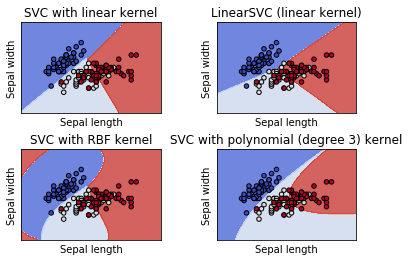

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
%matplotlib inline

def make_meshgrid(x, y, h=.02):
    """
    根据特征向量，和网格间距参数，绘制网格点阵图
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """绘制决策边界.

    Parameters
    ----------
    ax: 绘图对象
    clf: 分类模型
    xx: 特征数据点
    yy: 特征数据点
    params: 字典参数
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# 加载数据
iris = datasets.load_iris()
# 选取样本数据的两个特征
X = iris.data[:, :2]
y = iris.target

C = 1.0 
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')
plt.figure(figsize=(11,11))
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)


X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## 参数寻优

In [2]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(svm.SVC(), param_grid={"C":[0.1, 1, 10], "gamma": [1, 0.1, 0.01]}, cv=4)
grid.fit(X, y)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 1, 'gamma': 0.1} with a score of 0.82


d:\env\pythonve\test36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
